# <u>Waze Customer Chrun Prediction Project</u>

- **Author:** Vishnu Venugopal
- **Role:** Data Analyst | Organization : Waze (Simulation)
- **Project Type:** Certification Project -  Google Advanced Data Analytics
- **Tools Used:** Python, `Pandas`, `NumPy`, `Matplotlib`, `Seaborn`, `Scikit-Learn`, `Statsmodels`, `Plotly`, `SciPy`

---

## <u>Business Context</u>

Waze is seeking to improve its user retention by identifying users likely to churn. As a data analyst on the team, I conducted an end-to-end analysis using the PACE (Plan, Analyze, Construct, Execute) framework. The goal is to develop a churn prediction model and offer actionable insights for stakeholder decisions.


## <u>Objectives</u>

- Understand user behavior contributing to churn  
- Perform hypothesis testing and regression analysis  
- Build a machine learning classification model to predict churn  
- Provide clear insights and recommendations to reduce churn

---
> *Note: This project spans multiple phases, initially developed over six structured notebooks across the Google Advanced Data Analytics curriculum, and merged here into one streamlined, professional analysis.*

---


## <u>The PACE Workflow</u>

### <u>**The PLAN Stage**</u>

#### Project Overview

* **Objective:** Predict monthly user churn for Waze and identify the key factors contributing to churn.
* **Business Impact:** Helps Waze improve user retention by identifying at-risk users for targeted interventions.
* **Approach:** Applied the PACE workflow to perform data cleaning, EDA, statistical testing, and machine learning.

#### **Project Questions**
* Who is most likely to churn?
* Why do users churn?
* When do users churn?

#### **Data Source**
This project uses a dataset called `waze_dataset.csv`. It contains synthetic data created for this project in partnership with Waze. 

The dataset contains:

**14,999 rows** – each row represents one unique user 
**13 columns**

| Column Name              | Type   | Description                                                                 |
|--------------------------|--------|-----------------------------------------------------------------------------|
| ID                       | int    | A sequential numbered index                                                 |
| label                    | obj    | Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month |
| sessions                 | int    | The number of occurrences of a user opening the app during the month       |
| drives                   | int    | An occurrence of driving at least 1 km during the month                     |
| device                   | obj    | The type of device a user starts a session with                             |
| total_sessions           | float  | A model estimate of the total number of sessions since a user has onboarded |
| n_days_after_onboarding  | int    | The number of days since a user signed up for the app                       |
| total_navigations_fav1   | int    | Total navigations since onboarding to the user’s favorite place 1          |
| total_navigations_fav2   | int    | Total navigations since onboarding to the user’s favorite place 2          |
| driven_km_drives         | float  | Total kilometers driven during the month                                    |
| duration_minutes_drives  | float  | Total duration driven in minutes during the month                           |
| activity_days            | int    | Number of days the user opens the app during the month                      |
| driving_days             | int    | Number of days the user drives (at least 1 km) during the month             |

### <u>**The ANALYZE Stage**</u>

In [1]:
# Importing packages for data manipulation
import pandas as pd
import numpy as np

# Importing packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in the data frame and preventing Jupyter from redacting them
pd.set_option('display.max_columns', None)

In [2]:
# Loading the Waze dataset
df0 = pd.read_csv("waze_dataset.csv")

#### <u>**1. Initial Data Exploration**</u>
> **The purpose** of this section is to investigate and understand the data provided.
> **The goal** is to use the data frame to perform a cursory inspection of the provided dataset and inform team members of your findings.
> *This section has three parts:*
> * **Part 1:** Understand the situation
> * **Part 2:** Understand the data
>    - Create a pandas dataframe for data learning, future exploratory data analysis (EDA), and statistical activities
>    - Compile summary information about the data to inform next steps
> * **Part 3:** Understand the variables
>    - Use insights from your examination of the summary data to guide deeper investigation into variables

##### <u>**1.1 Initial Data Overview and Summary Statistics**</u>

In [3]:
# Display the first 5 rows of the dataset
df0.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [4]:
# Size of the dataset
print(f'Size of the dataset is: {df0.size}')

# Shape of the dataset
print(f'Shape of the dataset is: {df0.shape}')

Size of the dataset is: 194987
Shape of the dataset is: (14999, 13)


In [5]:
# Information about the dataset dtypes
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [6]:
# Find the duplicate rows, if any, in the dataset
df0.duplicated().sum()

np.int64(0)

In [7]:
# Missing values in the dataset
df0.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [8]:
# Desctription of the dataset
df0.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


<u>**Initial Summary the dataset stats**</u>
1. The dataset has **14999** columns and **13** columns.
2. The size of the dataset is **194987**.
3. There are **3 dtypes** of variables in this dataset:
    - `label` and `device` are of type `object`.*(Most likely categoricals of interest)*
    - `total_sessions`, `driven_km_drives` and `duration_minutes_drives` are of type `float64`.
    - The rest of the variables are of type `int64`
4. There are **no duplicate** rows in the dataset. 
5. There are **700** missing values in the `label` columns. *(to be investigated and actioned during a later stage)*
6. Possible outliers in the dataset about max value being abnormally more than the standard deviation. *(to be investigated and actioned during a later stage)*

---

In [9]:
# More information on the categorical columns
print(f'Labels : {df0['label'].unique()}'
      f'\nDevices : {df0["device"].unique()}')

Labels : ['retained' 'churned' nan]
Devices : ['Android' 'iPhone']


<u>**Information on the Categorical Variables**</u>

1. `label`: This column has **2 variables** on **customer retention**, i.e., `churned` or `retained`. (*Please note that, at this stage of analysis, there are **null/NaN** values in the `label` column which will be acted on appropriately in the next stage*)
2. `device`: This column has **2 variables** about the type of device, i.e., `iPhone`, `Android`.

---

In [10]:
df0.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


<u>**Information on the Outliers in the dataset**</u>
1. The column `driven_km_drives` has a min value of **~60 kms** and a  max value of **~21,183 kms** with a mean of **~4,039 kms**, which indicates possibility of outliers in this column. 
2. The column `duration_minutes_drives` also seems to indicate the possibility of outliers as the mean of `duration_minutes_drives` is **~1860 minutes** and the max value of this column is **~15851 minutes**.

---

In [11]:
# Isolating the rows with null values:
null_df0 = df0[df0['label'].isnull()]
not_null_df0 = df0[~df0['label'].isnull()]

# Display summary stats of rows with null values.
null_df0.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [12]:
# Display summary stats of rows with NOT null values.
not_null_df0.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [13]:
# Percentage ratio of missing vs not_missing values 
# compared against the type two types of devices.
print(f'Percentage Device type with Missing Labels : {round(null_df0['device'].value_counts(normalize=True)*100,2)}'
      f'\n\nPercentage Device type without Missing Labels :{round(not_null_df0['device'].value_counts(normalize=True)*100,2)}'
      f'\n\n Percentage Device type in the full dataset : {round(df0['device'].value_counts(normalize=True)*100,2)}')


Percentage Device type with Missing Labels : device
iPhone     63.86
Android    36.14
Name: proportion, dtype: float64

Percentage Device type without Missing Labels :device
iPhone     64.52
Android    35.48
Name: proportion, dtype: float64

 Percentage Device type in the full dataset : device
iPhone     64.48
Android    35.52
Name: proportion, dtype: float64


<u>**Information on the Missing/NaN Values**</u>
1. First, I isolated and divided the dataset **`null_df`** vs. **`not_null_df`**, corresponding to the **missing** vs. **not missing** `label` respectively.
2. Then I compared the summary statistics of the observation with **missing retention labels** with those that are **not missing any values**.
    - This reveals nothing remakable.(*The **mean** and the **standard deviation** are fairly consistent between the two groups.*)
3. Further, I compared the ratio of `device` types (i.e., `iPhone`, `Android`) with the `null_df0`, `not_null_df0` and the full dataset, `df0`.
    - Found that the missing values by each device are consistent with their representation in the overall dataset.
    - There is nothing to suggest a non-random cause of the missing data, and it would be safe to remove them depending on the type of Machine Learning model's sensitivity.

---

In [14]:
# Calculating counts of churned vs retained users in the dataset
print(f'Count of Churned Users : {df0['label'][df0['label'] == 'churned'].count()} ' 
      f'which is {round(df0['label'][df0['label'] == 'churned'].count()/df0['label'].count()*100,2)}% of the dataset')

print(f'Count of Retained Users : {df0['label'][df0['label'] == 'retained'].count()} '
      f'which is {round(df0['label'][df0['label'] == 'retained'].count()/df0['label'].count()*100,2)}% of the dataset')

Count of Churned Users : 2536 which is 17.74% of the dataset
Count of Retained Users : 11763 which is 82.26% of the dataset


In [15]:
# Comparing medians of each variable for churned vs retained users. 
df0.groupby('label').median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


In [16]:
# Making df0 as the unaltered version of the dataset.df0
# Creating a copy of df0 and storing it in a new dataframe 'df' which will be hence used for manipulation.
df = df0.copy()   

In [17]:
# Adding a new column called 'km_per_drive'
df['km_per_drive'] = df['driven_km_drives']/df['drives']

# Calculating the median of 'km_per_drive' for churned vs retained users.
median_km_per_drive = df.groupby('label')[['km_per_drive']].median(numeric_only=True)
median_km_per_drive

,km_per_drive
label,
churned,74.109416
retained,75.014702


In [18]:
# Adding new column called 'km_per_driving_day'
df['km_per_driving_day'] = df['driven_km_drives']/df['driving_days']

# Calculating the median of 'km_per_driving_day' for churned vs retained users.
median_km_per_driving_day = df.groupby('label')[['km_per_driving_day']].median(numeric_only=True)
median_km_per_driving_day

,km_per_driving_day
label,
churned,697.541999
retained,289.549333


In [19]:
# Adding new column called 'drives_per_driving_day'
df['drives_per_driving_day'] = df['drives']/df['driving_days']

# Calculating the median of 'drives_per_driving_day' for churned vs retained users.
median_drives_per_driving_day = df.groupby('label')[['drives_per_driving_day']].median(numeric_only=True)
median_drives_per_driving_day

,drives_per_driving_day
label,
churned,10.0000
retained,4.0625


In [20]:
# Class imbalance ratio by count
df.groupby('label')['device'].value_counts()

label     device 
churned   iPhone     1645
          Android     891
retained  iPhone     7580
          Android    4183
Name: count, dtype: int64

In [21]:
# Class imbalance ratio by percentage
df.groupby('label')['device'].value_counts(normalize=True)*100

label     device 
churned   iPhone     64.865931
          Android    35.134069
retained  iPhone     64.439344
          Android    35.560656
Name: proportion, dtype: float64

<u>**Key Observations about the data disrtibution**</u>

1. This dataset contain **~82.26%** of **retained users** and **~17.74%** of **churned users**. 
2. Comparing the **medians** of each variable for `churned` and `retained` users, we see that(*Note: **Median** was used instead of **mean** as we did not want the **outlier** seen above, to unduly affect the portrayal of a typical user. The mean is subject to the influence of outliers, while the median represents the middle value of the distribution regardless of any outlying values.*):
    * Users who `churned` averaged **~3** more `drives` than the`retained` users.*(50 vs. 47 drives)* during the last month, but at the same time, these `retained` users had used the  Waze app *(`activity_days`)* **more than twice** as many days as `churned` users in the same period. *(8 vs. 17 days)*
    * Users who `churned` drove **~200 kms***(`driven_km_drives`)* and **~2.5 hours***(`duration_minutes_drives`)* more than the `retained` users during the last month. 
>  * It seems that churned users had more drives in fewer days, and their trips were farther and longer. Perhaps this is suggestive of a user profile.    


3. I created a few new variables (columns) for further exploration using the median:
    * `km_per_drive`: The `retained` user drove about **~1 km** more than the `churned` user. 
    * `km_per_driving_day`: The`churned` user drove **~698 kms** each day, which is **~240%** the per-drive-day distance of `retained` user.
    * `drives_per_driving_day`: The `churned` user has a similarly disproportionate *(**~246%** more)* number of drives-per-day compared to `retained` users.

> 4. The ratio of `iPhone` users and `Android` users is consistent between the `churned` group (*~62% vs. ~35%*) and the `retained` group, and those ratios are both consistent with the ratio found in the overall dataset.

---

##### <u>**1.2 EDA Summary Overview PART 1:**</u>

* It is clear from the above figures that, regardless of whether a user `churned` or not, the users represented in this data are serious drivers! 
* It would probably be safe to assume that this data does not represent typical drivers at large. Perhaps the data—and in particular the sample of `churned` users—contains a high proportion of long-haul truckers.
* Given how much these users drive, it would be worthwhile to recommend to Waze that they gather more data on these super-drivers. 
* It's possible that the reason for their driving so much is also the reason why the Waze app does not meet their specific set of needs, which may differ from the needs of a more typical driver, such as a commuter.

#
___
___

#### <u>**2. Data Exploration and Cleaning**</u>
>* **The purpose** of this project is to conduct exploratory data analysis (EDA) on a provided dataset.
>* **The goal** is to continue the examination of the data that you began in the previous Course, adding relevant visualizations that help communicate the story that the data tells.
>*This activity has 4 parts:*
> * **Part 1:** Imports, links, and loading
> * **Part 2:** Data Exploration
>    - Data cleaning
> * **Part 3:** Building visualizations
> * **Part 4:** Evaluating and sharing results

<u>**Objective:**</u>

- Fixing data types *(if needed)*
- Handling nulls/missing values *(if any)*
- Handling outliers *(if any)*
- Removing or encoding irrelevant features
- Brief rationale for key decisions

1. Identify the variables.
2. Out of the **13** columns, the `ID` column can be dropped as it is of no productive use for analysis. 
2. Handle the **700** missing rows.
3. Encoding `label` and `device` variables.

In [22]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,km_per_driving_day,drives_per_driving_day
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,138.360267,11.894737
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,128.186173,1246.901868,9.727273
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,382.393602,11.875000
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,304.530374,13.333333
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,219.455667,3.777778


##### **2.1 Identifying the applicable variables/columns for analysis**
* Since we are interested in user churn, the `label` column is essential.
* Besides `label`, variables that tie to the user behavior will be the most applicable. So all variables except `ID` ties to the user behavior.
* `ID` can be dropped from the analysis since we are not interested in identifying a particular user. Moreover, `ID` does not provide meaningful information about the churn. *(unless `ID` is assigned based on user sign-up time. But in the simulation, we will consider the latter)*

**Variable Definition:**
- `label` - Categorical Variable (Target Variable)
- `sessions` - Continuous Variable (int)
- `drives` - Continuous Variable (int)
- `total_sessions` - Continuous Variable (float)
- `n_days_after_onboarding` - Continuous Variable (int)
- `total_navigation_fav_1` - Continuous Variable (int)
- `total_navigation_fav_2` - Continuous Variable (int)
- `driven_km_drives` - Continuous Variable (float)
- `duration_minutes_drives` - Continuous Variable (float)
- `activity_days` - Continuous Variable (int)
- `driving_days` - Continuous Variable (int)
- `device` - Categorical Variable

---

##### **2.2 Handling nulls/missing values**
Earlier, we identified **700** missing values in the `label` columns.

If the missing data are missing completely at random (MCAR), meaning that the reason for missingness is independent of the data values themselves, we can proceed with a complete-case analysis by removing the rows with missing values. Otherwise, we will need to investigate the root cause of the missingness and make sure it won't interfere with the statistical inference and modeling. 

In this dataset, the missing values will skew the data as `label` is our target variable of interest. 

So **we will have to delete the nulls** when needed. 

---

##### <u>**2.3 Visualizing the data distribution:**</u>

In [23]:
# Creating a helper function to render a boxplot since it will be used multiple times in this section:
def boxplotter(data, x, **kwargs):
    plt.figure(figsize=(12,4))
    sns.boxplot(data=data, x=x, fliersize=1,**kwargs)
    plt.title(f'{x.capitalize()} Boxplot')
    plt.show();

# Creating a helper function to render a histogram since it will be used multiple times in this section:
def histogrammer(data, x, median_text = True, **kwargs):
    median = round(df[x].median(),1)                         # Calculate the median
    plt.figure(figsize=(12,4))                               # Set the figure size
    ax = sns.histplot(data=data, x=x, **kwargs)              # Plot the histogram
    plt.axvline(median, color = 'r', linestyle = '--')       # Plot the median line
    if median_text == True:                                  # Add median text unless set to False
        ax.text(0.20, .95, f'median = {median}', color='r',
                ha = 'left', va = 'top', transform = ax.transAxes)
    else:
        print('Median: ', median)
    plt.title(f'{x.capitalize()} Histogram');

---

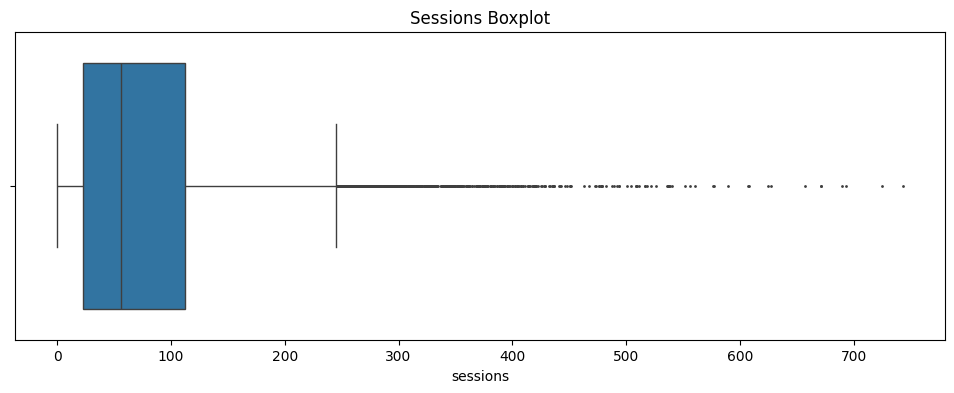

In [24]:
# Boxplot of sessions
boxplotter(df, 'sessions')

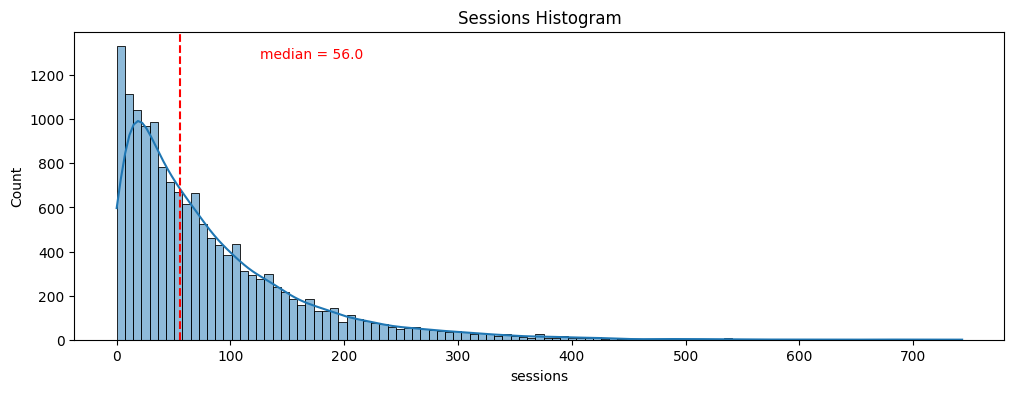

In [25]:
# Histogram of sessions
histogrammer(df, 'sessions', kde = True)

<u>**2.3.1. The number of occurrences of a user opening the app during the month: `sessions`**</u>

* As seen above, the `sessions` variable is a **right-skewed distribution** with half of the observation having **56 or fewer** `sessions`. 
* However, as indicated by the boxplot, some users have more than **700** `sessions`.

---

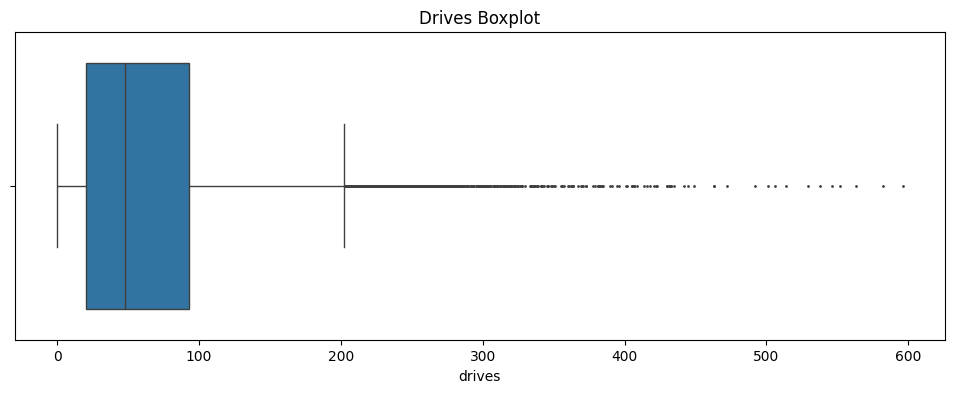

In [26]:
# Boxplot of drives
boxplotter(df, 'drives')

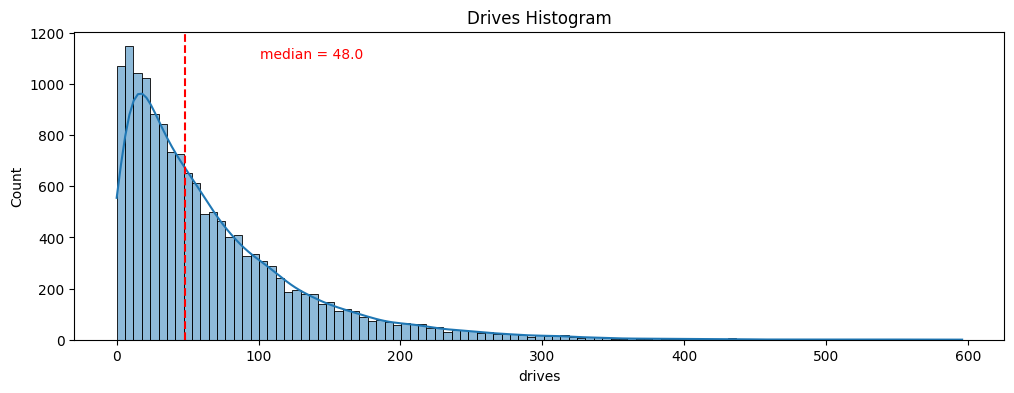

In [27]:
# Histogram of drives
histogrammer(df, 'drives', kde = True)

<u>**2.3.2. An occurrence of driving at least 1 km during the month: `drives`** </u>

* As seen above, the `drives` histogram follows a distribution similar to the `sessions` variable. It is a **right-skewed distribution**, approximately **log-normal**, with a median of **48**.
* However, as indicated on the boxplot, some drivers had over **400** `drives` during the same period. 

---

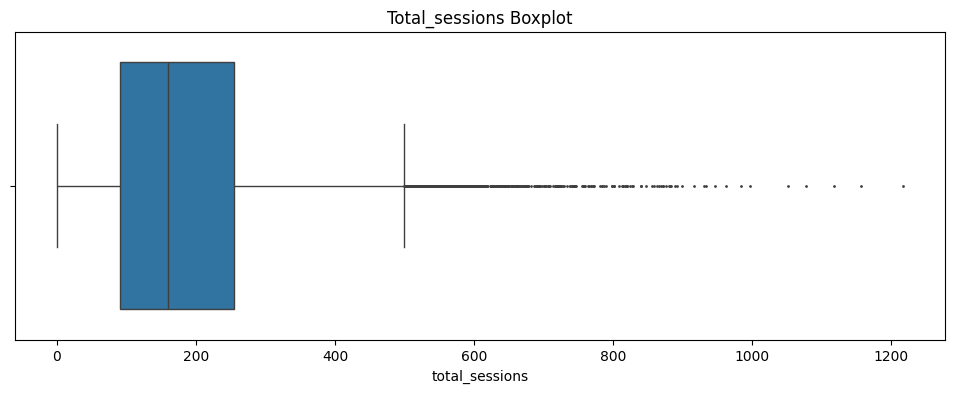

In [28]:
# Box Plot of total sessions:
boxplotter(df, 'total_sessions')

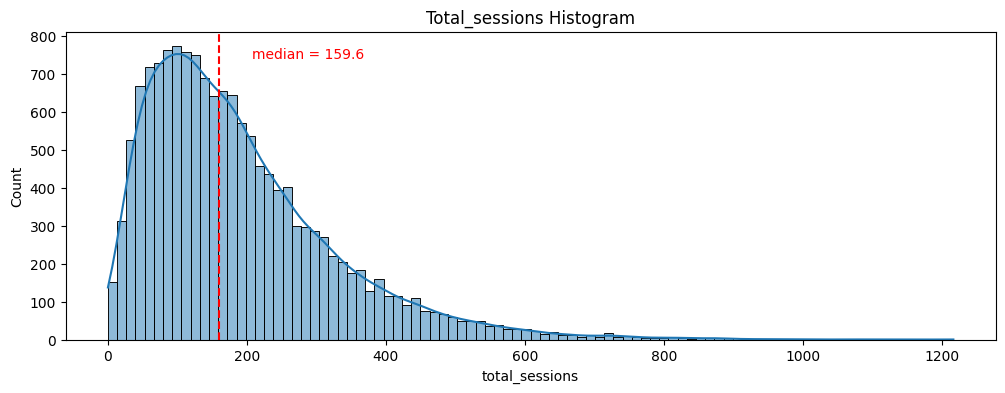

In [29]:
# Histogram of total sessions:
histogrammer(df, 'total_sessions', kde = True)

<u>**2.3.3. A model estimate of the total number of sessions since a user has onboarded: `total_sessions`**</u>

* As seen above, the `total_sessions` variable is a **right-skewed distribution**. The median total number of sessions is **159.6**  *(**~160**)*.
* This is interesting information because, if the median of `sessions` was **56** and the median `total_sessions` was **~160**, then it seems that a large proportion of a user's *(estimated)* total `drives` might have taken place in the last month.
* This is something that may need to be examined more closely later.

---

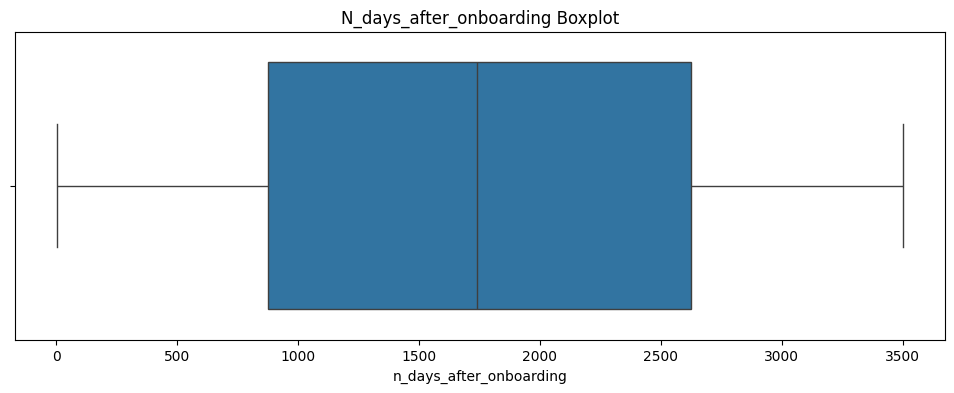

In [30]:
# Box Plot of n_days_after_onboarding:
boxplotter(df, 'n_days_after_onboarding')

Median:  1741.0


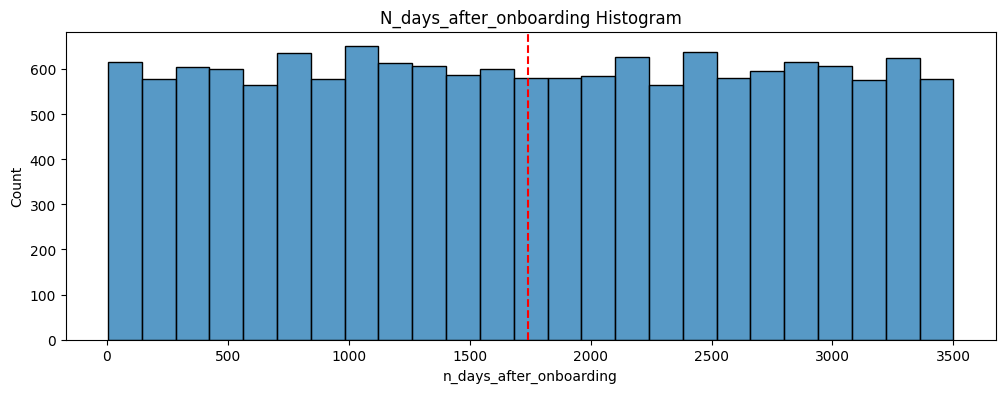

In [31]:
# Histogram of n_days_after_onboarding:
histogrammer(df, 'n_days_after_onboarding', median_text = False)

<u>**2.3.4. The number of days since a user signed up for the Waze app: `n_days_after_onboarding`**</u>
* The **total user tenure** (i.e., number of days since onboarding) is a **uniform distribution** with values ranging from **near-zero **to **~3,500** *(~9.5 years)*.

---

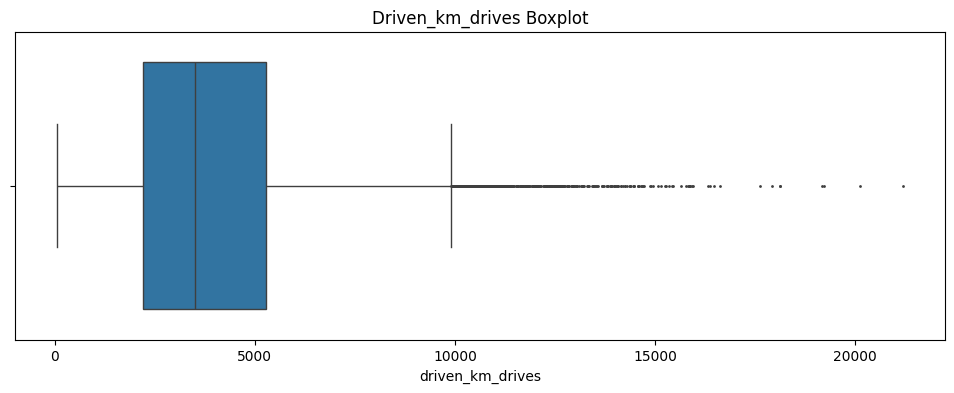

In [32]:
# Boxplot of driven kms per drive:
boxplotter(df, 'driven_km_drives')

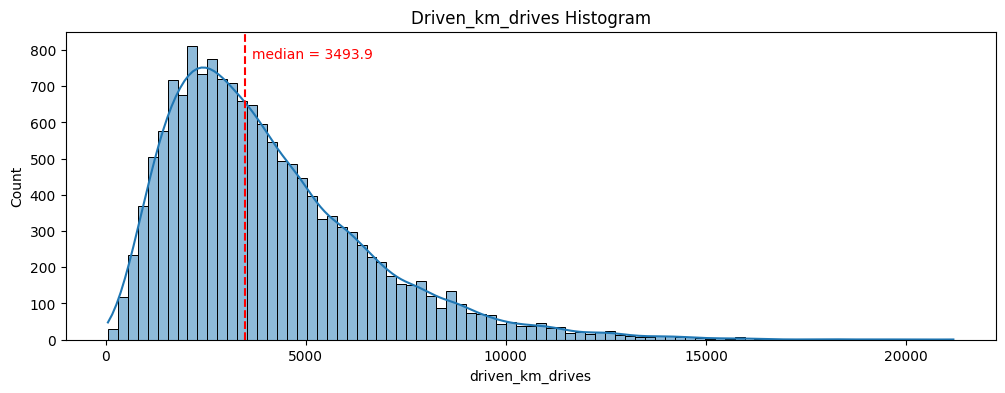

In [33]:
histogrammer(df, 'driven_km_drives', kde = True)

<u>**2.3.5. Total kilometers driven during the month: `driven_km_drives`**</u>

* As seen above, the `driven_km_drives` variable is a **right-skewed distribution** with half the users driving under **~3494 kms**.
* As we had discovered in the initial EDA, the users in this dataset drives a lot. The longest distance driven in a month being **~21183 kms** whcih is over half the circumference of the earth.

---

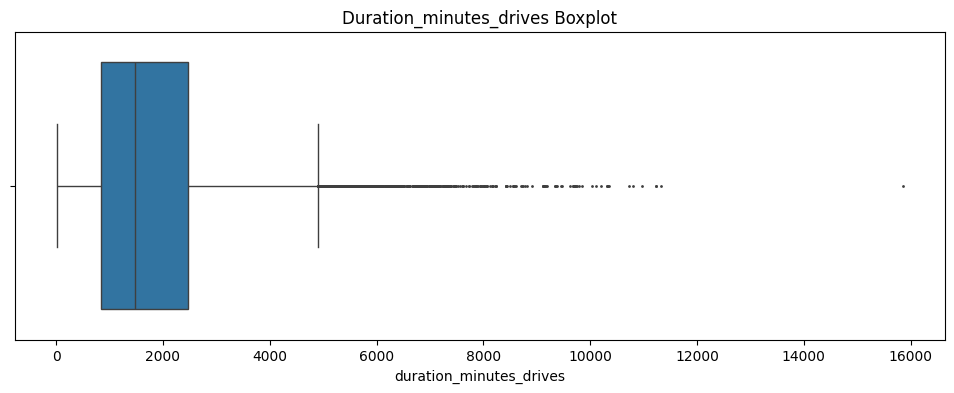

In [34]:
# Boxplot of duration_minutes_drives
boxplotter(df, 'duration_minutes_drives')

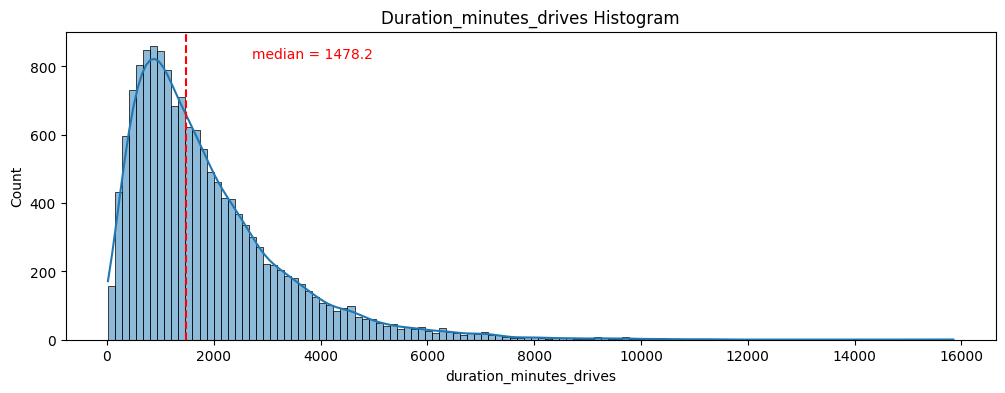

In [35]:
# Histogram of duration_minutes_drives
histogrammer(df, 'duration_minutes_drives', kde = True)

<u>**2.3.6. Total duration driven *(in minutes)* during the month: `duration_minutes_drives`**</u>

* The `duration_minutes_drive` variable has a **heavily skewed right tail**. Half of the users drove less than **~1478 minutes** *(~25 hours)*, but some users clocked over **250 hours** over the month. 

---

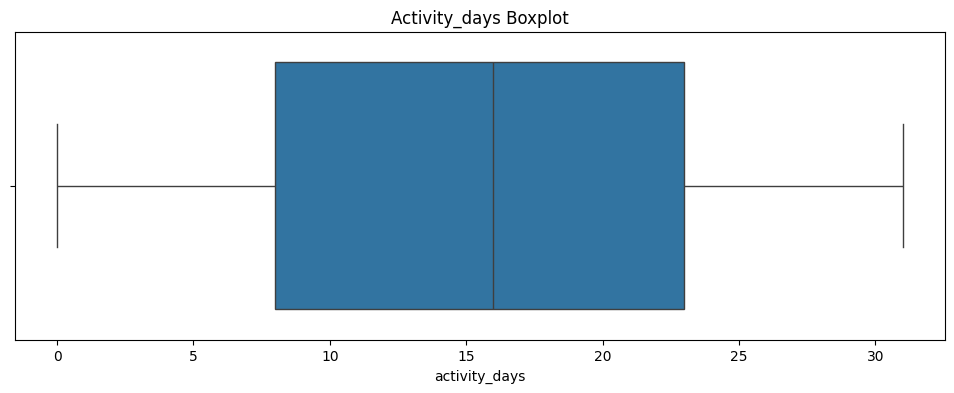

In [36]:
# Boxplot of activity_days
boxplotter(df, 'activity_days')

Median:  16.0


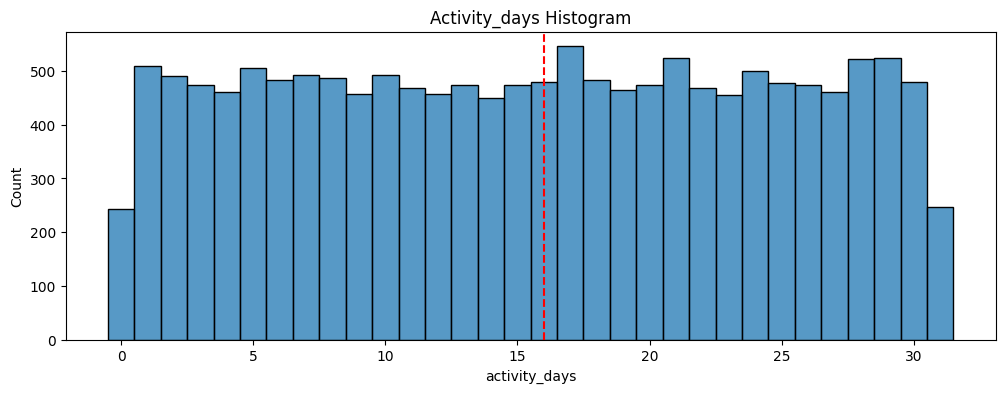

In [37]:
# Histogram of activity_days
histogrammer(df, 'activity_days', median_text=False, discrete = True)


<u>**2.3.7. The number of days the user opens the Waze app during the month: `activity_days`**</u>

* Within the last month, users opened the Waze app a median of **16 times**.
* The boxplot reveals a **centered distribution**.
* The histogram shows a nearly **uniform distribution** of **~500** people opening the Waze app on each count of days. 
* However, the histogram also shows us that there are **~250** people who did not open the app at all and **~250** people who opened the app every day of the month.
* This distribution is noteworthy because it does mirror the `sessions` distribution, which I think would be closely correlated with `activity_days`.

---

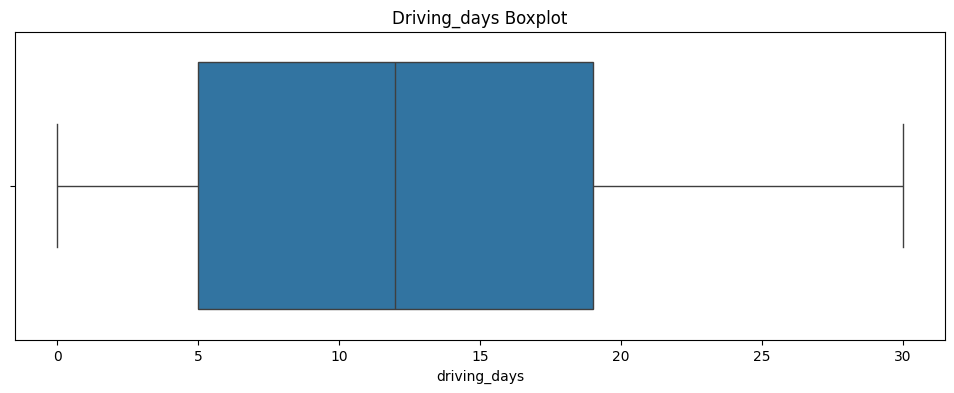

In [38]:
# Boxplot of driving_days
boxplotter(df, 'driving_days')

Median:  12.0


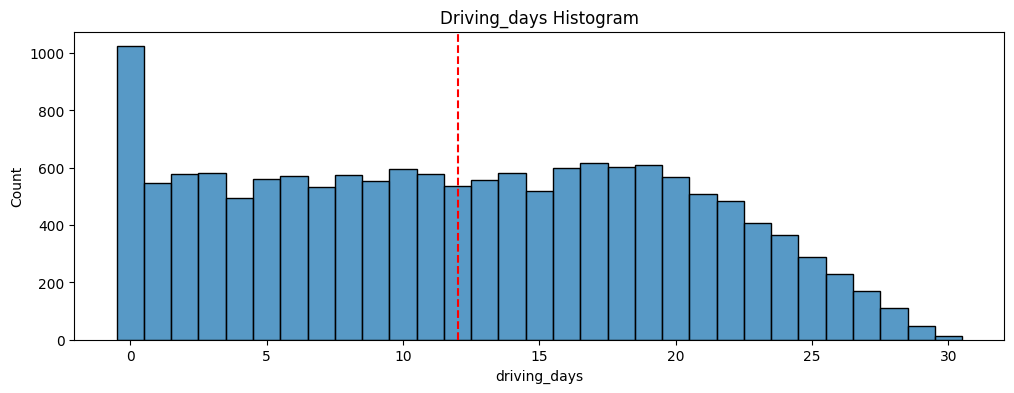

In [39]:
# Histogram of driving_days
histogrammer(df, 'driving_days', median_text=False, discrete = True)

<u>**2.3.8. The number of days the user drives *(at least 1 km)* during the month: `driving_days`**</u>

* The number of days users drove each month is **almost uniformly distributed**, and it largely correlates with the number of days they opened the app that month, except the `driving_days` **distribution tails off on the right**
* However, there were almost twice as many users ***(~1000 vs. ~550)*** who did not drive at all during the month. 
* This might be counterintuitive when considered together with the information from `activity_days`. That variable has **~500** users opening the app on each of most of the day counts, but there were only **~250** users who did not open the app at all during the month and **~250** users who opened the app every days.


**Flagging this for further investigation later!**

---

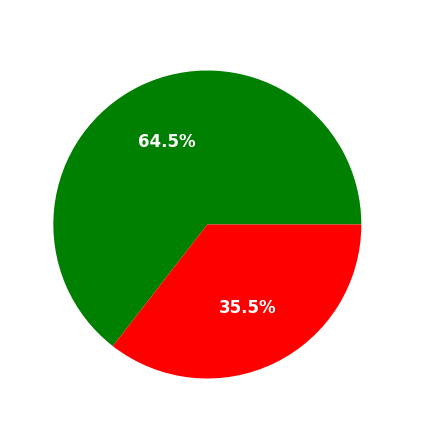

In [40]:
# Pie Chart of device type
fig = plt.figure(figsize=(5,5))
data =  df['device'].value_counts()

plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
               f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%', 
        colors=['g', 'r'], 
        textprops={'fontsize': 12, 'color': 'white', 'weight': 'bold'}
        )


plt.title('Users by Device', color='white'); 

<u>**2.3.9. Type of device a user starts a session with: `device`**</u>

* There are nearly twice as many `iPhone` users as `Android` users represented in this data.

---

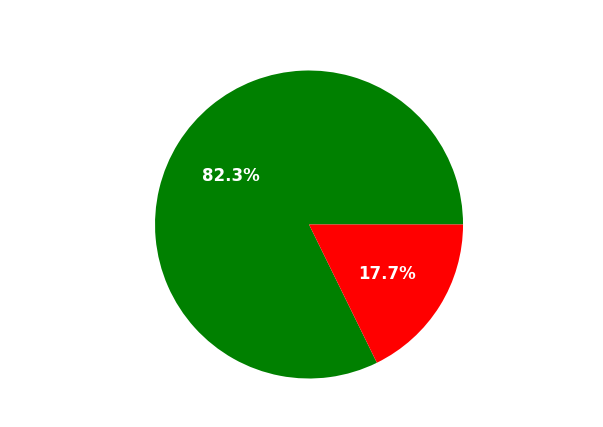

In [41]:
data = df['label'].value_counts()
fig = plt.figure(figsize = (5,5))

plt.pie(data, labels = [f'{data.index[0]} : {data.values[0]}',
                        f'{data.index[1]} : {data.values[1]}'],
                        autopct='%1.1f%%',
                        colors=['g', 'r'],
                        textprops={'fontsize': 12, 'color': 'white', 'weight': 'bold'}
                        )

plt.title('Count of Retained vs. Churned', color='white'); 

<u>**2.3.10 Binary target variable (`retained` vs `churned`) for if a user has churned anytime during the course of the month: `label`**</u>

* Less than **18%** of the users `churned`.

---

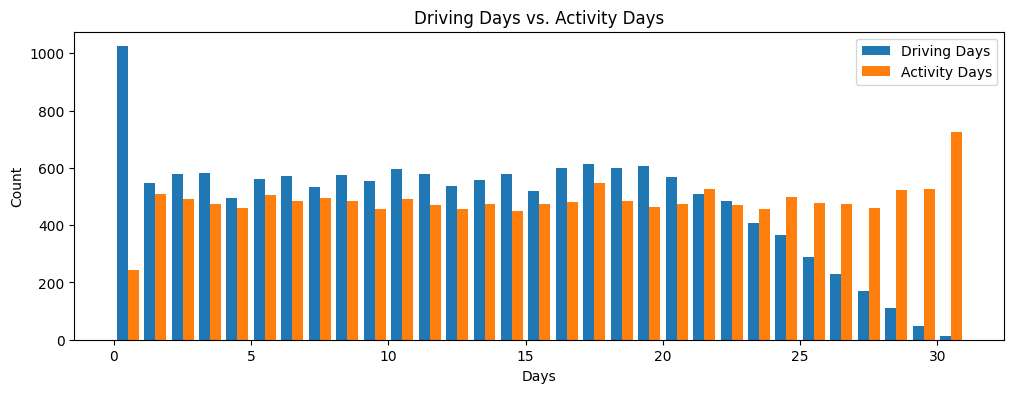

In [42]:
# Histogram of driving_days vs. activity_days
fig = plt.figure(figsize=(12,4))
label = ['Driving Days', 'Activity Days']
plt.hist(df[['driving_days', 'activity_days']],
         bins = range(0,32),
         label = label)

plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Driving Days vs. Activity Days')
plt.legend();


As both `driving_days` and `activity_days` represent the **counts of days** over a month and they are also closely related, I plotted them together on a single histogram, as seen above.

* As observed previously, this might be counterintuitive. After all, why are there *fewer* users who did not use the app at all during the month and *more* users who did not drive at all during the month. Looks inversely related.
* On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they are not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.
* Nonetheless, it might be worthwhile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.
* To confirm this, let me find the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [43]:
# Printing the maximum number of days for driving_days and activity_days
df[['driving_days', 'activity_days']].max()

driving_days     30
activity_days    31
dtype: int64

As suspected, `activity_days` has a data point for 1 day more than `driving_days'. 

* Although it's possible that not a single user drove all **31** days of the month, it's highly unlikely, considering there are **15,000** people represented in the dataset.

* One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing `driving_days` and the y-axis representing `activity_days`.

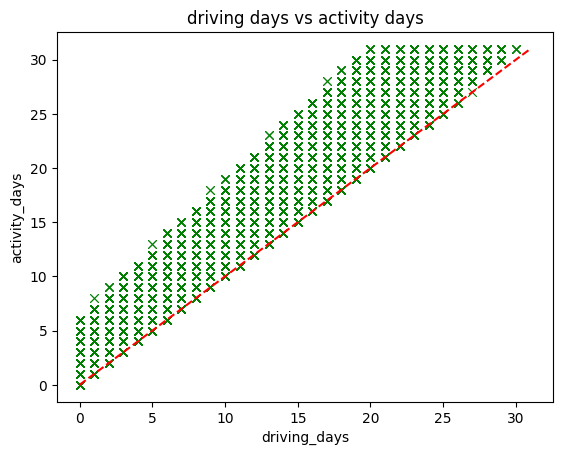

In [44]:
# Scatter plot of driving_days vs. activity_days
sns.scatterplot(data = df, x= 'driving_days', y='activity_days', c='g', marker= 'x');
plt.title('driving days vs activity days')
plt.plot([0,31],[0,31], color='r', linestyle='--');

<u>**2.3.11 `driving_days` vs. `activity_days`**</u>

* Looks like there is a theoretical limit. If you use the app to drive, then by definition, it must count as a day-use as well. In other words, you cannot have more `drive_days` than `activity_days`. 
* None of the samples in this data violates this rule, which is good. 

---

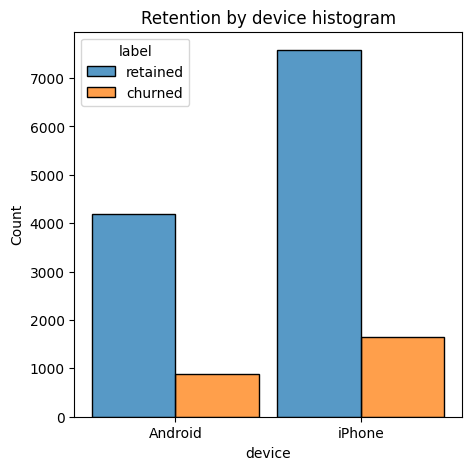

In [45]:
# Histogram of device vs. label
fig = plt.figure(figsize=(5,5))
sns.histplot(data=df,
             x = 'device',
             hue='label',      
             multiple='dodge', # this is to make the bars side by side
             shrink=0.9        # this is to make the bars thinner
             )
plt.title('Retention by device histogram');

<u>**2.3.12 Retention by device (`label` vs. `device`)**</u>
*(i.e., Retention by device, to understand how many iPhone users were retained/churned and how many Android users were retained/churned)*

* The proportion of churned users to retained users is consistent between device types.


---

In [46]:
df['km_per_driving_day'].describe()

C:\Users\Vishnu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

**Observation of description stats of `km_per_driving_day`:** 
* The mean value for `km_per_driving _day` here is infinity, the standard deviation is NaN, and the max value is infinity.
* This is a result of 0 values in the `driving_days` column
* As a result, the ratio of `driven_km_drives` to `driving_days` is also infinity, resulting in NaN for the mean value and infinity for the max value.
* To fix this issue, I will be using `np.inf` to refer the value of infinity.

In [47]:
# Converting infinity values to zero
df.loc[df['km_per_driving_day'] == np.inf, 'km_per_driving_day'] = 0
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

* The maximum value is **15,420** `km_per_driving_day`. This is physically impossible. Driving **100 km/hr** for 12 hours is 1,200 km.
* It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than **1,200 km**.

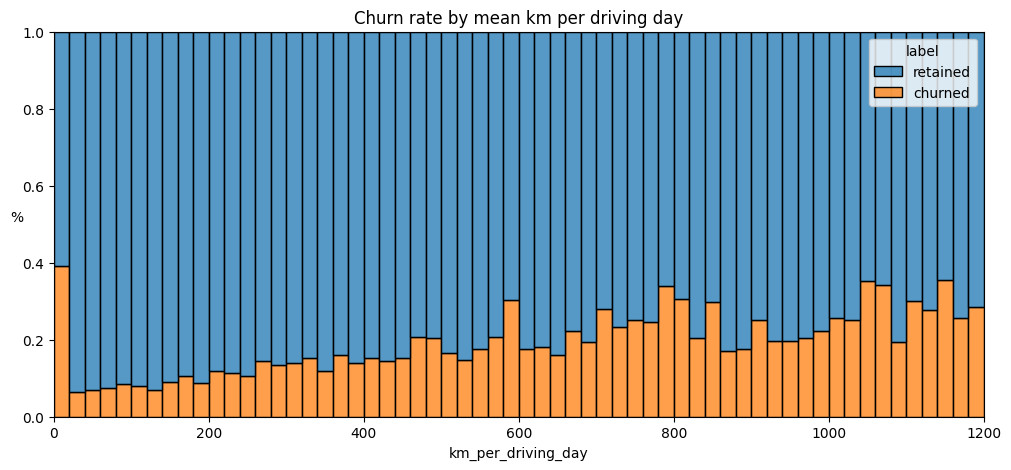

In [48]:
# Histogram of km_per_driving day (disregarding those users with values greater than 1200kms)
plt.figure(figsize=(12,5))
sns.histplot(data = df, 
             x = 'km_per_driving_day',
             hue = 'label',
             multiple = 'fill',
             bins= range(0,1201,20))
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

<u>**2.3.13 Retention by kilometers driven per driving day (`label` vs. `km_per_driving_day`)**</u>
*(i.e., Retention by kilometers driven per driving)*

*Please note that earlier we had created a new column/variable in `df` called `km_per_driving_day,` which is the ratio of `driven_km_drives` to `driving_days`.*

* The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in earlier. 
* It would be worth investigating further the reasons for long-distance users to discontinue using the Waze app.

---

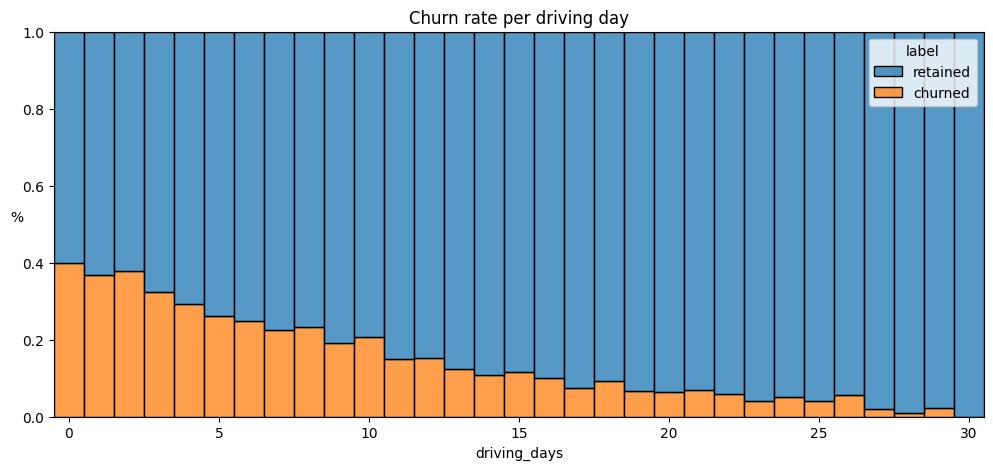

In [49]:
# Histogram of driving_days
plt.figure(figsize = (12,5))
sns.histplot(data = df, 
             x = 'driving_days',
             hue = 'label',
             multiple = 'fill',
             bins = range(1,32),
             discrete = True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

<u> **2.3.14 Churn rate per number of driving days (`label` vs. `driving_days`)**</u>

* The churn rate is highest for people who didn't use Waze app much during the last month. The more times they used the app, the less likely they were to churn. While **40%** of the users who didn't use the app at all last month `churned`, nobody who used the app **30 days** `churned`.

* This could mean: 
    - If people who used the app a lot `churned`, it would likely indicate **dissatisfaction**. 
    - When people who don't use the app churns, it might be the result of **dissatisfaction** in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

---

In [50]:
# Creating a new columns called `percent_sessions_in_last_month`
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

Median:  0.4


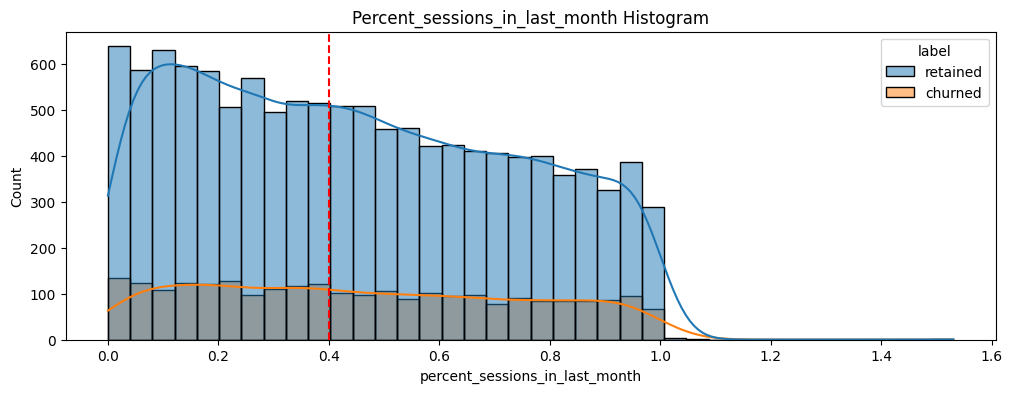

In [51]:
# Histogram of percent_sessions_in_last_month
histogrammer(df, 'percent_sessions_in_last_month',
             hue = 'label',
             multiple = 'layer',
             median_text = False,
             kde = True
             )

In [52]:
# Comparing the median value of n_days_after_onboarding and percent_sessions_in_last_month.
round(df[['n_days_after_onboarding', 'percent_sessions_in_last_month']].median(),2)

n_days_after_onboarding           1741.00
percent_sessions_in_last_month       0.42
dtype: float64

* Half of the people in the dataset had **40%** or more of their `sessions` in just the last month, yet the overall median time since onboarding is **1741 days** *(or almost **~5 years**)*.

* If this was true then this would suggests that the dataset is skewed towards users who have used the app a lot in the last month. To get a better picture of this, we can try a histogram for just 40% or more of their total sessions in the last month.

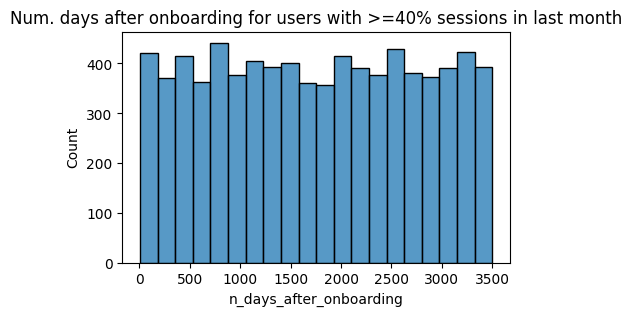

In [53]:
# Histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.
data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');

<u>**2.3.15 Proportion of sessions that occurred in the last month ( `label` vs. `percent_sessions_in_last_month`)**</u>

* The number of days since onboarding for users with **40%** or more of their total sessions occurring in just the last month is a **uniform distribution**. 
* This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

---

##### <u>**2.4 Handling Outliers**</u>

The box plots from earlier indicated that many of the variables have **outliers**. These **outliers** do not seem to be data entry errors; they are present because of the **right-skewed distribution** of the data. These variables that I feel we need to take action for outliers are: 
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

My thoughts on handling the identified outlier:
* There are three main possible options for dealing with outliers:
    * **Keeping them as they are:**  I have kept a backup unaltered dataframe called `df0` for this purpose. If I want to do further EDA/Analysis or for a dataset you are preparing for a model that is resistant to outliers. 
    * **Deleting them:** If identified that these outliers are mistakes, typos or errors, and the dataset will be used for modeling or machine learning, then deleting may be required. 
    * **Reassigning them:** If the dataset is small and/or the data will be used for modeling or machine learning, I could replace the outliers with new values that align with the objective.
        * *(It may be useful to impute outlying data with more reasonable values. Let me set a threshold based on a percentile of the distribution.)*

In [54]:
# Creating a function that calculates a threshold percentile of a given column, 
# then imputes values > threshold with the value at the threshold percentile.

def outlier_imputer(col_name, percentile):
    threshold = df[col_name].quantile(percentile)               # Calculate threshold
    df.loc[df[col_name] > threshold, col_name] = threshold      # Impute threshold for values > than threshold
    
    # print('{:>25} | percentile: {} | threshold: {}'.format(col_name, percentile, threshold))

In [55]:
# Applying the function at 95th percentile threshold to the above mentioned columns
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

In [56]:
# Checking if imputing worked
df.describe()

C:\Users\Vishnu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\Vishnu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1.499900e+04,14999.000000,1.499200e+04,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,inf,578.963113,inf,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,NaN,1030.094384,NaN,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,1.008775e+00,0.000000,0.000000e+00,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,3.323065e+01,136.238895,1.800000e+00,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,7.488006e+01,272.889272,4.666667e+00,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,1.854667e+02,558.686918,1.216667e+01,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,inf,15420.234110,inf,1.530637


In [57]:
# Dropping earlier created `km_per_drive` and `drives_per_driving_day` columns, for now, to keep data clean for later analysis.
df.drop(columns=['km_per_drive', 'drives_per_driving_day'], inplace=True)

# Dropping `percent_sessions_in_last_month` and `km_per_driving_day` columns, for now, to keep data clean for later analysis.
df.drop(columns=['percent_sessions_in_last_month', 'km_per_driving_day'], inplace=True)

##### <u>**2.5. Summary Overview of Data Cleaning and Analysis:**</u>

* Analysis revealed that the overall churn rate is **~17%**, and that this rate is consistent between **iPhone** users and **Android** users.
* EDA has revealed that users *who drive very long distances* on their *driving days* are *more likely to churn*, but users *who drive more often* are *less likely to churn*. 
* The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.
* There is missing data in the user churn label, so we might need  further data processing before further analysis.
* There are many outlying observations for drives, so we might consider a variable transformation to stabilize the variation.
* The number of drives and the number of sessions are both strongly correlated, so they might provide redundant information when we incorporate both in a model.
* On average, retained users have fewer drives than churned users.

1. Less than **18%** of users `churned`, and **~82%** were `retained`.
2. Nearly all the variables were either very **right-skewed** or **uniformly distributed**. 
    * For the **right-skewed distributions**, this means that most users had values in the lower end of the range for that variable. 
    * For the **uniform distributions**, this means that users were generally equally likely to have values anywhere within the range for that variable.
3. Most of the data was not problematic, and there was no indication that any single variable was completely wrong. However, several variables had highly improbable or perhaps even impossible outlying values, such as `driven_km_drives`. 
4. Some of the monthly variables also might be problematic, such as `activity_days` and `driving_days`, because one has a max value of **31** while the other has a max value of **30**, indicating that data collection might not have occurred in the same month for both of these variables.
5. I would  want to ask the Waze data team to confirm that the monthly variables were collected during the same month, given the fact that some have max values of **30 days** while others have **31 days**. 
6. I would also want to learn why so many long-time users suddenly started using the app so much in just the last month. Was there anything that changed in the last month that might prompt this kind of behavior?
7. Distance driven per driving day *(`driven_km_drives`)* had a *positive correlation with user churn*. 
    - The farther a user drove on each driving day, the more likely they were to churn. 
8. On the other hand, number of `driving_days` had a *negative correlation with churn*. 
    - Users who drove more days of the last month were less likely to churn.

---

#### <u>**3. Data Exploration and Hypothesis Testing**</u>
> **The purpose** of this project is to demonstrate knowledge of how to conduct a two-sample hypothesis test.
> **The goal** is to apply descriptive statistics and hypothesis testing in Python.
> *This activity has three parts:*
> * **Part 1:** Imports and data loading
>    - What data packages will be necessary for hypothesis testing?
> * **Part 2:** Conduct hypothesis testing
>    - How did computing descriptive statistics help you analyze your data?
>    - How did you formulate your null hypothesis and alternative hypothesis?
> * **Part 3:** Communicate insights with stakeholders
>    - What key business insight(s) emerged from your hypothesis test?
>    - What business recommendations do you propose based on your results?

In [58]:
# Importing statistics package
from scipy import stats

##### <u>**3.1. EDA before Hypothesis Testing**</u>

Note: In the dataset, `device` is a categorical variable with labels `iPhone` and `Android`.

In order to perform this analysis:
* Turn each label into and integer. i.e., assign `1` for an `iPhone` and `2` for `Android`
* After that, assign this label back to a new column called `device_type`.

In [59]:
map_dictionary = {'Android' : 2, 'iPhone' : 1}  # Dictionary for mapping the categorical device variable to numerical.

df['device_type'] = df['device'].map(map_dictionary) # Creating a new column called `device_type` which is a numeric mapping of `device` column.

df['device_type'].head()

0    2
1    1
2    2
3    1
4    2
Name: device_type, dtype: int64

I am interested in finding the relationship between `device_type` and the number of `drives` which should serve as the base for my initial hypothesis. Before moving on to the hypothesis question let us look into the mean number of `drives` for each `device_type`

In [60]:
# Mean of `drives` for each 'device_type'
df.groupby('device_type')['drives'].mean()

device_type
1    64.446340
2    63.353482
Name: drives, dtype: float64

* Based on the averages of `drives` for each `device_type`, it appears that drivers who use and `iPhone` device to interact with the application have a higher number of `drives` on average.
* However, this difference might arise from random sampling, rather than being a true difference in the number of drives. To assess whether the difference is statistically significant, we will run a hypothesis testing on this.

---

##### <u>**3.2. Hypothesis Testing**</u>

Since the two group of `device_type` are independent , we will use a two-sample t-test.

<u>**3.2.1. Defining the null hypothesis and the alternative hypothesis.**</u>

> **Null Hypothesis ($H_0$)** : There is **no difference** in the average number of `drives` between drivers who use and `iPhone` device and drivers who use and `Android` device.

> **Alternative Hypothesis ($H_A$)** : There is **a difference** in the average number of `drives` between drivers who use and `iPhone` device and drivers who use and `Android` device.

<u>**3.2.2. Choosing an appropriate significance level.**</u>

> * We will set the significance level at 0.05 (5%) for this test.

In [61]:
# Significance Level
alpha = 0.05

<u>**3.2.3. Finding the p-value.**</u>

In [62]:
# Isolate the `drives` column for iPhone users.
iPhone = df[df['device_type'] == 1]['drives']

# Isolate the `drives` column for Android users.
Android = df[df['device_type'] == 2]['drives']

# Perform the t-test
t_test_summary = stats.ttest_ind(a = iPhone, b = Android, equal_var = False)
print('p-value : {:.2f}.'.format(t_test_summary.pvalue)) 

p-value : 0.24.


* p-value = 0.24

<u>**3.2.4. Interpretation (i.e., `Reject` or `Fail to Reject` the null hypothesis)**</u>

> * Since the p-value(0.24) is larger than the chosen significance level (0.05), we will fail to reject the null hypothesis. 

> * Therefore, we conclude that there is **not** a *statistically significant difference* in the average number of drives between drivers who use `iPhones` and drivers who use `Androids`.

##### <u>**3.3. Result and interpretation of the two-sampled t-test (Hypothesis Testing):**</u>

* The key business insight is that drivers who use iPhone devices on average have a similar number of drives as those who use Androids.
* One potential next step is to explore what other factors influence the variation in the number of drives, and run additonal hypothesis tests to learn more about user behavior. Further, temporary changes in marketing or user interface for the Waze app may provide more data to investigate churn.

In [63]:
# Dropping `device_type` column for now to keep data clean for further analysis.
df.drop(columns=['device_type'], inplace=True)

---

#### <u>**4. Regression Modeling**</u>
> **The purpose** of this project is to demonstrate knowledge of exploratory data analysis (EDA) and a binomial logistic regression model.
> **The goal** is to build a binomial logistic regression model and evaluate the model's performance.
> *This activity has three parts:*
> * **Part 1:** EDA & Checking Model Assumptions
>   - What are some purposes of EDA before constructing a binomial logistic regression model?
> * **Part 2:** Model Building and Evaluation
>   - What resources do you find yourself using as you complete this stage?
> * **Part 3:** Interpreting Model Results
>   - What key insights emerged from your model(s)?
>   - What business recommendations do you propose based on the models built?

- Feature selection and encoding
- Model training
- Coefficient interpretation

In [64]:
# Importing packages for Regression and Analysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split


##### <u>**4.1. EDA to prepare the dataset for Regression**<u>

For this simulation, we will be using the **Binomial Logistic Regression** model.

>> <u>**IMPORTANT NOTE:**</u>
>> * ***For the initial EDA till section 6, we have been using and manipulating the dataframe `df` which is a copy of the original unaltered dataframe, `df0`.*** 
>> * ***Since we are moving towards modelling and machine learning, we will be using a fresh version of dataframe `df` which is a copy of the original unaltered `df0`.***

In [65]:
df = df0.copy()

<u>**4.1.1. Dropping irrelevant columns**</u>

Dropping `ID` column since we do not need this information for analysis. 

In [66]:
# Dropping ID column
df.drop(columns=['ID'], inplace=True)

<u>**4.1.2. Class Balance of the dependent variable, `label`.**</u>

In [67]:
# Class imbalance for `label`
df['label'].value_counts(normalize=True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

<u>**4.1.3. Creating new features**</u>

We will now be adding some features *(some of which were earlier created and removed for exploratory data analysis purposes)* to the dataset to create a dataframe that is ready for modeling.

1. `km_per_driving_day`: Which represents the mean distance driven per driving day for each user. From an earlier EDA, we saw that this feature correlates with the churning rate.
2. `professional_driver`: This will be a binary feature where `1` is for users who had 60 or more drives <u>**and**</u> drive on 15+ days in the last month. This is to separate professional drivers from other drivers.

In [68]:
# 1. Creating `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# Replacing infinite values with 0 which we saw in an earlier step.
df.loc[df['km_per_driving_day'] == np.inf, 'km_per_driving_day'] = 0 

In [69]:
# 2. Creating `professional_driver` column
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)


I want to do a quick inspection of this new variable to check the count of professional drivers and non-professional drivers. 

I also want to calculate the churn rate within each class (professional and non-professional).


In [70]:
# Checking the count of professionals and non-professionals
print(df['professional_driver'].value_counts())

# Checking the in-class churn rate
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)*100

professional_driver
0    12405
1     2594
Name: count, dtype: int64


professional_driver  label   
0                    retained    80.120227
                     churned     19.879773
1                    retained    92.443730
                     churned      7.556270
Name: proportion, dtype: float64

* The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. 
* This seems like it could add a predictive signal to the model.

---

<u>**4.1.4. Imputing outliers**</u>

In [71]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,578.963113,0.172945
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,1030.094384,0.378212
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,15420.234110,1.000000


The following columns seems to have outliers, i.e., the columns have max value that are multiple standard deviations above the 75% percentile and this indicates outliers in these variables:
* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`


We will impute these outlying values with the value at the 95th percentile of each column and change to this value any value that exceeds it in the column.

In [72]:
# Imputing outliers using the helper function `outlier_imputer` that we made earlier.

for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1', 
               'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,76.568705,64.058204,184.031320,1749.837789,114.415228,27.214281,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.172945
std,67.297958,55.306924,118.600463,1008.513876,124.686795,36.735583,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.378212
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.000000
max,243.000000,201.000000,454.363204,3500.000000,424.000000,124.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.000000


<u>**4.1.5. Handling Missing Values**</u>

In an EDA, we saw that there is no evidence of a non-random cause of the **700** missing values in the `label` column, and because these observations comprise less than 5% of the data, we will drop the rows.

In [73]:
# Dropping rows with missing data in `label` column
df = df.dropna(subset=['label'])

<u>**4.1.6. Encoding Categorical Target Variables**</u> *(Feature Engineering)*

* Assigning `0` for all `retained` users.
* Assigning `1` for all `churned` users.

In [74]:
# Creating a binary `label2` column
df['label2'] = np.where(df['label'] == 'churned', 1 , 0)
df[['label', 'label2']].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


##### <u>**4.2. Validating the assumptions for Logistics Regresssion**</u>

The following are the assumption that I will be trying to validate:
1. Independent Observations
2. No Extreme Outliers
3. Little to no multicollinearity among `X` predictors
4. Linear relationship between X and the **logit** of `y`

<u>**4.2.1. Independent Observation**</u>

* I will proceed with assuming that observations are independent for this simulated case study, as instructed.

<u>**4.2.2. No Extreme Outliers**</u>

* This assumption has already been addressed in an earlier outlier handling step

<u>**4.2.3. Collinearity Assumption**</u>

In [75]:
# Generating a Correlation Matrix
df_corr = df.select_dtypes(include = ['number'])
df_corr.corr(method = 'pearson')

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,label2
sessions,1.000000,0.996938,0.597299,0.007101,0.001854,0.008536,0.002995,-0.004545,0.025113,0.020294,-0.011569,0.443654,0.034911
drives,0.996938,1.000000,0.595615,0.006949,0.001012,0.009510,0.003455,-0.003884,0.024347,0.019603,-0.010972,0.443997,0.035943
total_sessions,0.597299,0.595615,1.000000,0.006615,0.000188,0.010363,0.001015,-0.000344,0.015757,0.012957,-0.016162,0.254532,0.024568
n_days_after_onboarding,0.007101,0.006949,0.006615,1.000000,-0.002483,-0.004968,-0.004655,-0.010167,-0.009418,-0.007321,0.011764,0.003770,-0.129263
total_navigations_fav1,0.001854,0.001012,0.000188,-0.002483,1.000000,0.002853,-0.007321,0.005686,0.010896,0.010406,-0.000160,-0.000206,0.052389
total_navigations_fav2,0.008536,0.009510,0.010363,-0.004968,0.002853,1.000000,0.003567,-0.003008,-0.004425,0.002000,0.006751,0.007126,0.015032
driven_km_drives,0.002995,0.003455,0.001015,-0.004655,-0.007321,0.003567,1.000000,0.690554,-0.007445,-0.009550,0.344765,-0.000901,0.019771
duration_minutes_drives,-0.004545,-0.003884,-0.000344,-0.010167,0.005686,-0.003008,0.690554,1.000000,-0.007894,-0.009425,0.239630,-0.012127,0.040406
activity_days,0.025113,0.024347,0.015757,-0.009418,0.010896,-0.004425,-0.007445,-0.007894,1.000000,0.947687,-0.397433,0.453825,-0.303851
driving_days,0.020294,0.019603,0.012957,-0.007321,0.010406,0.002000,-0.009550,-0.009425,0.947687,1.000000,-0.407917,0.469776,-0.294259


Let us visualize this correlation on a heatmap

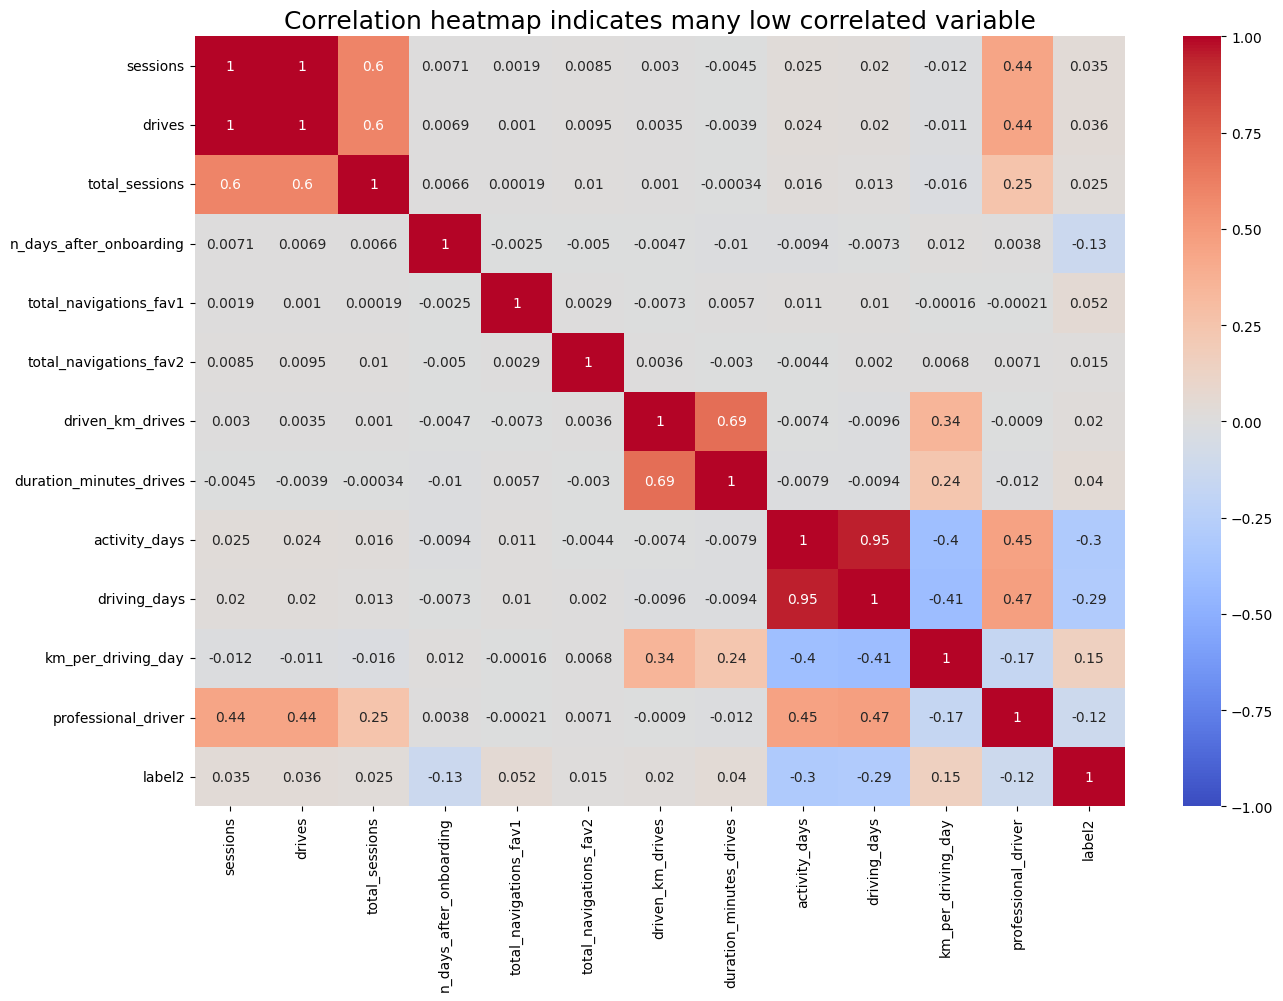

In [76]:
# Plotting a correlation heatmap
plt.figure(figsize = (15,10))

sns.heatmap(df_corr.corr(method = 'pearson'), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm')

plt.title('Correlation heatmap indicates many low correlated variable', fontsize = 18);

If there are predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7**, these variables are strongly multicollinear. 

**Note:** 0.7 is an arbitrary threshold that I have chosen in line with average industry requirement.

* The following variables are multicollinear with each other:
  1. `sessions` ~ `drives` = 1.0
  2. `driving_days` ~ `activity_days` = 0.95

---

##### <u>**4.2. Creating Dummies**</u> *(Feature Engineering)*

Since I have selected `device` as an X variable, I will need to create a dummy variable since this variable is categorical.

Note on possibility of  overfitting: Variables with many categorical features should only be dummied if necessary, as each category will result in a coefficient for my model, which can lead to overfitting.
However, because this dataset only has one remaining categorical feature, i.e. `device`, we can just implement the transformation directly. 

So, in this case, I will be creating a new column called `device2` that encodes user devices as follows:
* `Android` -> `0`
* `iPhone -> `1`

In [77]:
# Creating new `device2` variable

df['device2'] = np.where(df['device'] == 'iPhone', 1, 0)
df[['device', 'device2']].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


##### <u>**4.3. Building the Logistic Regression Model**<u>


<u>**4.3.1. Assigning predictor and target variables**</u>

* I have determined that the target y variable will be `label2`, which will be used to predict.
* As for the predictor variable, we will be dropping the following variables and assigning them to `X`:
    - `label`, `label2` -> Since these are the target(y) variable.
    - `device` -> This is a non-binary encoded categorical variable, and we will be using `device2` instead.
    - `sessions`, `driving_days` -> Due to high multicollinearity.


In [78]:
# Isolating the predictor variables
X = df.drop(columns = ['label', 'label2', 'device', 'sessions', 'driving_days'])

# Isolating the target variable
y = df['label2']

<u>**4.3.2. Splitting the data**</u>

**Note:** *Because the target class is imbalanced(82% retained vs. 18% churned), I want to make sure that I dont get an unlucky split that over/under represents the frequency of the minority class. For this reason I will be using `stratify` parameter to `y` to ensure that the minority class appears in both train and test in the same proportion that it does in the over all dataset.*

In [79]:
# Splitting the data i.e. train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
152,108,186.192746,3116,243,124,8889.794236,4668.899349,24,612.305861,1,1
11899,2,3.487590,794,114,18,3286.545691,1780.902733,5,3286.545691,0,1
10937,139,347.106403,331,4,7,7400.838975,2349.305267,15,616.736581,0,0
669,108,454.363204,2320,11,4,6566.424830,4558.459870,18,410.401552,1,1
8406,10,89.475821,2478,135,0,1271.248661,938.711572,27,74.779333,0,1


<u>**4.3.2. Instantiating and fitting the model**</u>

In [80]:
# Instantiating the logistic regression model. 
model = LogisticRegression(penalty = None, max_iter =  1000)

# Fitting the model with the training set
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty=None)

Now that the model is fit, let me check the coefficient of each variable. The coeffiecient are in the order of how the variables are listed in the dataset.

The coefficients represent the change in the **log-odds** of the target variable for **every one unit increase in X**.

In [81]:
# Calling the coefficients of each variable.
pd.Series(model.coef_[0], index=X.columns)

drives                     0.001948
total_sessions             0.000368
n_days_after_onboarding   -0.000400
total_navigations_fav1     0.001257
total_navigations_fav2     0.001007
driven_km_drives          -0.000012
duration_minutes_drives    0.000110
activity_days             -0.105099
km_per_driving_day         0.000020
professional_driver       -0.010889
device2                    0.016694
dtype: float64

In [82]:
# Calling the intercept attribute to get the intercept of the model
model.intercept_

array([-0.06509664])

##### <u>**4.4. Check the final assumption**</u> *(i.e. Linear relationship between `X` and the **logit** of `y`)* 

I will make a regplot to verify the linear relationship between `X` and estimated log odds.


In [83]:
# Getting the model's predicted probabilities of the training set.
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.93716157, 0.06283843],
       [0.62358758, 0.37641242],
       [0.76570844, 0.23429156],
       ...,
       [0.91811901, 0.08188099],
       [0.84889398, 0.15110602],
       [0.93308625, 0.06691375]])

* In **logistic regression**, the relationship between a **predictor variable** and the **dependent variable** does not need to be linear, however, the **log-odds** (a.k.a. **logit**) of the dependent variable concerning the predictor variable should be linear.
* It follows the formula:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

In [84]:
# Creating a dataframe caled `logit_data` which is a copy of `X_train`.
logit_data = X_train.copy()


# Creating a new `logit` column in the new `logit_data' dataframe utilizing the above formula.
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

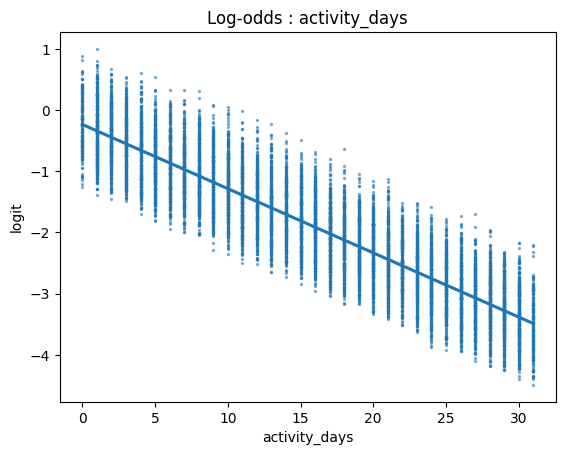

In [85]:
# Plotting a regplot of `activity_days` log-odds
sns.regplot(logit_data, x = 'activity_days', y = 'logit', scatter_kws={'s': 2, 'alpha' : 0.5})
plt.title('Log-odds : activity_days');

##### <u>**4.5. Results and evaluation of the Logistic Regression Model**</u> 

Since the logistic assumptions are met, I can interpret the model's result appropriately.

Let me predict the test data, then move on to scoring the model and finally show the result with a confusion matrix.

In [86]:
# Generating the predictions on X_test
y_preds = model.predict(X_test)

In [87]:
# Scoring the model (accuracy) on the test data
model.score(X_test, y_test)

0.8240559440559441

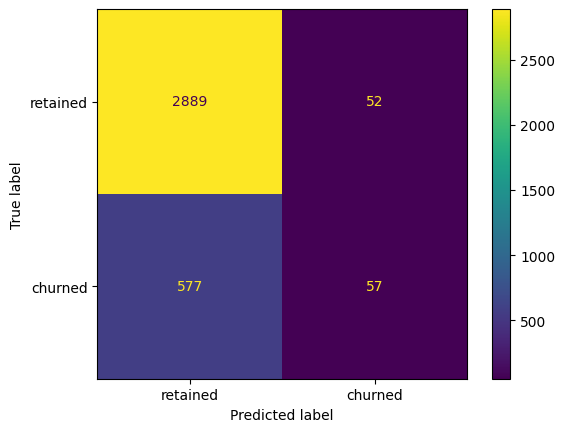

In [88]:
# Obtaining a confusion matrix
cm = confusion_matrix(y_test, y_preds)

# Displaying the confusion matrix

disp = ConfusionMatrixDisplay(cm, display_labels=['retained', 'churned'])
disp.plot(values_format= '')

At an initial glance of the confusion matrix, out of 3,575 data points in this matrix, 
- ~80.81% -> True Negatives
- ~16.14% -> False Negatives
- ~1.59% -> True Positive
- ~1.45% -> False Positive


Let us now look at how the model performed with respect to precision, accuracy, reall and f1. 

In [89]:
# Classification report of the model
print(classification_report(y_test, y_preds, target_names=['retained', 'churned']))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.52      0.09      0.15       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



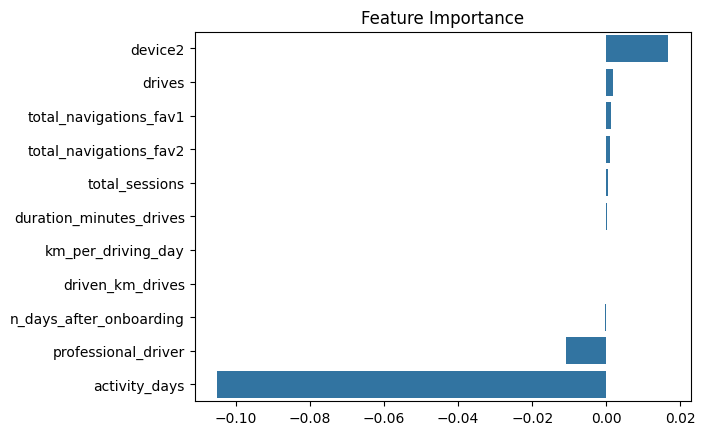

In [90]:
# Generating a bar graph of the model's coefficients for a visual representation of the importance of the model's features
feature_importance =  list(zip(X_train.columns, model.coef_[0]))          ## List of (columns_namem coefficient) tupels

feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse = True)   ## Sirting the list by coefficient value

# Plotting the feature importance graph
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient = 'h')

plt.title('Feature Importance');


##### <u>**4.6. Summary of Binomial Logistic Regression**</u>

1. Variable that most influenced the model's prediction:
    * `activity_days` was by far the most important feature in the model.
    * It had a negative correlation with user churn.
    * This was not surprising, as this variable was very strongly correlated with `driving_days`, which was known from EDA to have a negative correlation with churn.
2. In a previous EDA, users churn rate increased as the values in `km_per_driving_day` increased.
    * The correlation heatmap rendered earlier revealed that this variable had the strongest positive correlation with churn of any of the predictor variables by a relatively large margin.
    * In the model, it was the second-least-important variable.
3. In a multiple logistic regression model, features can interact with each other and these interactions can result in seemingly counterintuitive relationships.
    * This is both a strength and a weakness of predictive models, as capturing these interactions typically makes a model more predictive while at the same time making the model more difficult to explain.

5. Would I recommend that Waze use this model?
    * Well, it depends. What would the model be used for? If it's used to drive consequential business decisions, then no. The model is not a strong enough predictor, as made clear by its poor recall score.
    * However, if the model is only being used to guide further exploratory efforts, then it can have value.

5. What could I do to improve this model?
    * New features could be engineered to try to generate a better predictive signal.
    * In the case of this model, one of the engineered features (`professional_driver`) was the third-most-predictive predictor.
    * It could also be helpful to scale the predictor variables, and/or to reconstruct the model with different combinations of predictor variables to reduce noise from an unpredictive features.

6. It would be helpful to have drive-level information for each user (such as drive times, geographic locations, etc.). It would probably also be helpful to have more granular data to know how users interact with the app. For example, how often do they report or confirm road hazard alerts? Finally, it could be helpful to know the monthly count of unique starting and ending locations each driver inputs.

#### <u>**5. Building a Machine Learning Model**</u>

>**The purpose** of this model is to find factors that drive user churn.
>
>**The goal** of this model is to predict whether or not a Waze user is retained or churned.
>*This activity has three parts:*
>**Part 1:** Ethical considerations
>    - Consider the ethical implications of the request
>    - Should the objective of the model be adjusted?
>**Part 2:** Feature engineering
>    - Perform feature selection, extraction, and transformation to prepare the data for modeling
> **Part 3:** Modeling
> * Build the models, evaluate them, and advise on next steps

In [91]:
# Importing additional packages for data modeling
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score, roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Importing a function that helps plot feature importance
from xgboost import plot_importance

# Module to save our model once we fit it
import pickle

##### <u>**5.1. Feature Engineering Part 2**</u>

So far, we have created a few new features using feature engineering, i.e. 
1. `label2` and `device2`: Binary encoded categoricals for `device`(One of the predictor variable) and `label`(Target Variable)
2. `km_per_driving_day`: The mean distance driven per driving day for each user. 
3. `professional_driver`: This will be a binary feature where `1` is for users who had 60 or more drives <u>**and**</u> drive on 15+ days in the last month. This is to separate professional drivers from other drivers.

Now, we will be creating the following:
1. `percent_sessions_in_last_month`: Represents the percentage of each user's total sessions that were logged in their last month of use.
2. `total_sessions_per_day`: Represents the mean number of sessions per day *since onboarding*.
3. `km_per_hour`: Represents the mean kilometer per hour driven in the last month.
4. `km_per_drive`: Represents the mean number of kilometers per drive made in the last month for each user.
5. `percent_of_sessions_to_favorite`: Represents the percentage of total sessions that were used to navigate to one of the users' favorite places. *(**Please note:** This is a proxy representation for the percentage of overall drives that are to a favorite place. Since the total drives since onboarding are not contained in this dataset, total sessions must serve as a reasonable approximation. People whose drives to non-favorite place make up a higher percentage of their total drives might be less likely to churn, since they're making more drives to less familiar places.)*

In [92]:
# Creating `percent_sessions_in_last_month` feature
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']


In [93]:
# Creating `total_sessions_per_day` feature
df['total_sessions_per_day'] = df['total_sessions'] / df['n_days_after_onboarding']
df['total_sessions_per_day'].describe()

count    14299.000000
mean         0.329996
std          1.292124
min          0.000298
25%          0.050818
50%          0.100457
75%          0.208580
max         39.763874
Name: total_sessions_per_day, dtype: float64

In [94]:
# Creating `km_per_hour` feature
df['km_per_hour'] = df['driven_km_drives'] / (df['duration_minutes_drives'] / 60)
df['km_per_hour'].describe()

count    14299.000000
mean       189.443929
std        327.406274
min         72.013095
25%         92.887853
50%        121.231277
75%        191.157779
max      21800.540069
Name: km_per_hour, dtype: float64

***Note : `km_per_hour` is showing it's max value as 21800, which is problematic and it would be worthwhile to seek clarification from Waze team regarding how these features are collected to better understand why such unrealistic speeds are observed***

In [95]:
# Creating `km_per_drive` feature
df['km_per_drive'] = df['driven_km_drives'] / df['drives']
df['km_per_drive'].describe()

C:\Users\Vishnu\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.429900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.365506e+01
50%      7.429025e+01
75%      1.828194e+02
max               inf
Name: km_per_drive, dtype: float64

In [96]:
# Fixing the infinity problem in the `km_per_driving` feature.
df.loc[df['km_per_drive'] == np.inf, 'km_per_drive'] = 0
df['km_per_drive'].describe()

count    14299.000000
mean       225.792784
std        572.402205
min          0.000000
25%         32.899109
50%         72.319628
75%        177.431844
max       8889.794236
Name: km_per_drive, dtype: float64

In [97]:
# Creating `percent_of_sessions_to_favorite` feature
df['percent_of_drives_to_favorite'] = (
    df['total_navigations_fav1'] + df['total_navigations_fav2']) / df['total_sessions']


df['percent_of_drives_to_favorite'].describe()

count    14299.000000
mean         1.576575
std          8.262849
min          0.000000
25%          0.212409
50%          0.648292
75%          1.594046
max        671.949672
Name: percent_of_drives_to_favorite, dtype: float64

In [98]:
df.columns

Index(['label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device', 'km_per_driving_day',
       'professional_driver', 'label2', 'device2',
       'percent_sessions_in_last_month', 'total_sessions_per_day',
       'km_per_hour', 'km_per_drive', 'percent_of_drives_to_favorite'],
      dtype='object')

##### <u>**5.2. Modeling Workflow and Model Selection process**</u>

The final modelling dataset contains 14,999 samples. This is towards the lower end of what might be considered sufficient to conduct a robust model selection process, but still doable. 

I will be performing the following Machine Learning steps:
1. Splitting the data into train/validation/test sets (60/20/20).
2. Fit models and tune hyperparameters on training sets.
3. Perform final model selection on the validation set.
4. Assess the champion model's performance on the test set. 

<u>**5.2.1 Splitting the data into train/validation/test sets**</u>

1. Split the data 80/20 into an interim training set and test set, at random_state set to 42.
2. Split this interim training set 75/25 into training set and validation set, which will yeild a final ratio of 60/20/20 for training/validation/testing sets.

In [99]:
# Isolating the X variable:
X = df.copy()
X = X.drop(columns = ['label', 'label2', 'device'])

# Isolating the y variable:
y = df['label2']

# Splitting the data into interim training and test sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y,
                                              test_size=0.2, random_state=42)

# 4. Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr,
                                                  test_size=0.25, random_state=42)

Let me verify the number of samples in the partioned data

In [100]:
for x in [X_train, X_val, X_test]:
    print(len(x))

8579
2860
2860


This aligns with my expectation

<u>**5.2.2 Fit model and tune hyperparameters on training sets**</u>

<u>**RANDOM FOREST:**</u>

I will begin this stage by using `GridSearchCV` to tune a random forest model:
1. Instantiate the random forest classifier `rf` and set the random state to 42.
2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune.*(The more I tune, the better the model will fit the data, but it would take longer, depending on my computer's performance capacity)*:
     - `max_depth`
     - `max_features`
     - `max_samples`
     - `min_samples_leaf`
     - `min_samples_split`
     - `n_estimators`
3. Define a list of `scoring` metrics for GridSearch to capture (precision, recall, F1 Score, and accuracy)
4. Instantiate the `GridSearchCV` object `rf_cv` and pass to it the following arguments:
     - estimator=`rf`
     - param_grid=`cv_params`
     - scoring=`scoring`
     - cv: 5
     - refit: `recall`)*


In [101]:
# 1. Instantiate the model
rf = RandomForestClassifier(random_state = 42)

# 2. Define the parameter grid for testing (not too large)
cv_params = {
    'n_estimators': [100, 150],                    # Increased for stability
    'max_depth': [15, 25, 35],                     # Balanced depth control
    'max_features': ['sqrt', 0.5],                 # Feature subsampling to reduce overfitting
    'max_samples': [0.8, None],                    # Subsampling to reduce variance
    'min_samples_leaf': [2, 4],                    # Avoid too deep, weak leaf nodes
    'min_samples_split': [2, 5]                    # Controls how trees branch
}
# 3. Define scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Setup GridSearchCV
rf_cv = GridSearchCV(
    estimator = rf,
    param_grid = cv_params,
    scoring = scoring,
    cv = 5,
    refit='recall',
    n_jobs = -1,  # uses all cores
    verbose = 2
)

In [102]:
%%time

# Fitting (Warning: This will take time)
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
CPU times: total: 14.9 s
Wall time: 14min 10s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [15, 25, 35],
                         'max_features': ['sqrt', 0.5],
                         'max_samples': [0.8, None], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 150]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'],
             verbose=2)

In [103]:
# Examining the best score
rf_cv.best_score_

np.float64(0.12810612597066434)

In [104]:
# Examining the best hyperparameter combo
rf_cv.best_params_

{'max_depth': 25,
 'max_features': 0.5,
 'max_samples': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [105]:
# Creating a helper table to output all of the scores of the model.

def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create a dictionary that maps input metric to the actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and F1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create a table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [106]:
results = make_results('Random Forest CV', rf_cv, 'recall')
results


,model,precision,recall,F1,accuracy
0,Random Forest CV,0.489785,0.128106,0.202676,0.821308


***Note for reference: This is the score from the logistic regression that I performed earlier***

```python
                precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.52      0.09      0.15       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575
```

In [107]:
# Appending the Logistic Regression score, from earlier, to this table.
logreg_results = pd.DataFrame({'model': ['Logistic Regression'],
                              'precision': [0.52],
                               'recall': [0.09],
                               'F1': [0.15],
                               'accuracy': [0.82]
                              })

results = pd.concat([logreg_results, results], axis = 0)
results

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.520000,0.090000,0.150000,0.820000
0,Random Forest CV,0.489785,0.128106,0.202676,0.821308


* Aside from the **accuracy**, the scores are *not that good*.
* However, After hyperparameter tuning, the recall score improved from **0.09** with **Logistic Regression** to **0.128** with **Random Forest**, marking a **42%** relative increase *(0.038 absolute improvement)* in the model's ability to identify positive cases correctly, and about the same **accuracy**, and that it was trained on less data. 

<u>**XGBOOST**</u>

Trying to improve my scores using an XGBoost model.
1. Instantiate the XGBoost Classifier `xgb` and set `objective = 'binary: logistic'`
2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune.
     - `max_depth`
     - `min_child_weight`
     - `learning_rate`
     - `n_estimators`
3. Define a list of `scoring` metrics for GridSearch to capture (precision, recall, F1 Score, and accuracy)
4. Instantiate the `GridSearchCV` object `xgb_cv` and pass to it the following arguments:
     - estimator=`xgb`
     - param_grid=`cv_params`
     - scoring=`scoring`
     - cv: 5
     - refit: `recall`)*

In [108]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42,
                    eval_metric='logloss'       # Explicit and appropriate for binary classification/ logarithmic loss
                   )

# 2. Optimized parameter grid
cv_params = {
    'max_depth': [6, 12],                # Shallower trees = faster & good generalization
    'min_child_weight': [3,5, 3],         # Control leaf regularization
    'learning_rate': [0.01, 0.1],       # Faster convergence but small enough to learn
    'n_estimators': [100, 200],          # Reduced from 300 for time efficiency
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# 3. Define scoring
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# 4. Instantiate GridSearchCV
xgb_cv = GridSearchCV(estimator=xgb,
                      param_grid=cv_params,
                      scoring=scoring,
                      refit='recall',
                      cv=4,               # Reduced from 4 → much faster, still good insight
                      n_jobs=-1,
                      verbose=2
                     )



In [109]:
%%time
# 5. Fit
xgb_cv.fit(X_train, y_train)


Fitting 4 folds for each of 96 candidates, totalling 384 fits
CPU times: total: 16.7 s
Wall time: 3min 27s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5, 3],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1]},
             refit='recall',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'},
             verbose=2)

In [110]:
# Examining the best score
xgb_cv.best_score_

np.float64(0.17082815305981489)

In [111]:
# Examine the best parameters
xgb_cv.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 3,
 'n_estimators': 200,
 'subsample': 1}

In [112]:
# Appending the new xgb cv score to the results table
xgb_cv_results = make_results('XGBoost CV', xgb_cv, 'recall')
results = pd.concat([results, xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.520000,0.090000,0.150000,0.820000
0,Random Forest CV,0.489785,0.128106,0.202676,0.821308
0,XGBoost CV,0.447907,0.170828,0.247101,0.815712


This model fit the data even better than the random forest model. The recall score is nearly double the recall score from the logistic regression model, and it is almost 50% better than the random forest model's recall score, while maintaining a similar accuracy and precision score.

**Summary so far:**
Recall steadily improves across models:
> * +42% from Logistic Regression ➝ Random Forest
> * +89.8% from Logistic Regression ➝ XGBoost
> * +33.3% from Random Forest ➝ XGBoost

F1 Score also improves, suggesting better balance between precision and recall.

Accuracy remains very close across models (only ±0.005 difference), which reinforces why accuracy alone isn’t enough for imbalanced problems.

<u>**5.2.3. Perform final model selection on the validation set**</u>

Now, I will use the best random forest model and the best XGBoost model to predict on the validation data. Whichever performs better will be selected as the champion model. 

In [113]:
# Creating a helper function to generate a table of scores from the predictions on the validation data.

def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores:

    In: 
        mode_name (string): Your choice: how the model will be named in the output table.
        preds: numpy array of test predictions.
        y_test_data: numpy array of y_test_data.

    Out: 
        table: a pandas dataframe of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          }
                         )
    return table

<u>**RANDOM FOREST on validation set**</u>

In [114]:
# Using a random forest model to predict on validation data
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

In [115]:
# Get validation scores for the Random Forest model
rf_val_scores = get_test_scores('Random Forest on Validation set', rf_val_preds, y_val)

# Append to the results table
results = pd.concat([results, rf_val_scores], axis = 0)
results

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.520000,0.090000,0.150000,0.820000
0,Random Forest CV,0.489785,0.128106,0.202676,0.821308
0,XGBoost CV,0.447907,0.170828,0.247101,0.815712
0,Random Forest on Validation set,0.447761,0.118343,0.187207,0.817832


Seems like the scores went down from the training scores across all metrics, but only by very little. This means that the model did not overfit the training data.

<u>**XGBOOST on validation set**</u>

Let me do the same thing to get performance score of the XGBoost model on the validation data. 

In [116]:
# Using a XGBoost model to predict on validation data
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)

In [117]:
# Get validation scores for the XGBoost model
xgb_val_scores = get_test_scores('XGBoost on Validation set', xgb_val_preds, y_val)
# Append to the results table
results = pd.concat([results, xgb_val_scores], axis = 0)
results

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.520000,0.090000,0.150000,0.820000
0,Random Forest CV,0.489785,0.128106,0.202676,0.821308
0,XGBoost CV,0.447907,0.170828,0.247101,0.815712
0,Random Forest on Validation set,0.447761,0.118343,0.187207,0.817832
0,XGBoost on Validation set,0.424242,0.165680,0.238298,0.812238


Just like with the **random forest model**, the **XGBoost model's** validation scores were lower, but only very slightly. It is still the clear champion.

<u>**5.2.4. Assess the champion model's performance on the test set**</u>

Now, I will use the champion mode, i.e. XGBoost, to predict on the test dataset. 

This is to give a final indication on how I should be expecting the model to perform on new future data, if I do decision to use the model.

In [118]:
# Use XGBoost model to predict on the test data
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

# Get the test scores for XGBoost model
xgb_test_scores = get_test_scores('Champion Model: XGBoost on Test data', xgb_test_preds, y_test)

# Append to the results table
results = pd.concat([results, xgb_test_scores], axis = 0)
results

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.520000,0.090000,0.150000,0.820000
0,Random Forest CV,0.489785,0.128106,0.202676,0.821308
0,XGBoost CV,0.447907,0.170828,0.247101,0.815712
0,Random Forest on Validation set,0.447761,0.118343,0.187207,0.817832
0,XGBoost on Validation set,0.424242,0.165680,0.238298,0.812238
0,Champion Model: XGBoost on Test data,0.429907,0.181460,0.255201,0.812238


* **Recall: 0.181** — Highest recall overall, beating all models, including its CV and validation versions
* **F1 Score: 0.255** — Best balance between precision and recall
* **Accuracy: 0.812** — Slight drop from Logistic Regression (**0.820**), but still solid
> **Conclusion:** XGBoost generalizes well, especially for identifying churned users, which was your goal

Among all models, **XGBoost** on the test set delivered the **highest recall (0.181)** and **best F1 score (0.255)** — making it the most effective model for identifying **churned users**. While **Logistic Regression** had the **highest accuracy (0.820)**, it significantly **underperformed in recall**, which was our priority metric.

##### <u>**5.3. Model Evaluation**</u>

- Confusion matrix and metrics
- Feature importance
- Business interpretation of model output

<u>**5.3.1 Confusion Matrix**</u>

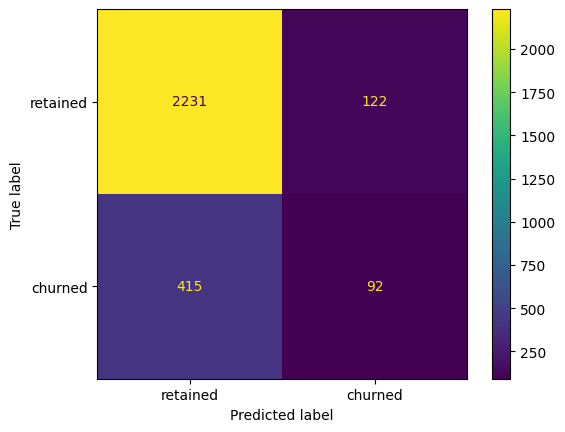

In [119]:
# Generating an array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels = xgb_cv.classes_)

# Plotting a Confusion Matrix:
disp = ConfusionMatrixDisplay(cm, display_labels = ['retained', 'churned'])

disp.plot(values_format='')

The model predicted over three times as many false negatives than it did false positives, and it correctly identified only **18.1%** of the users who actually `churned`.

<u>**5.3.1 Feature Importance**</u>

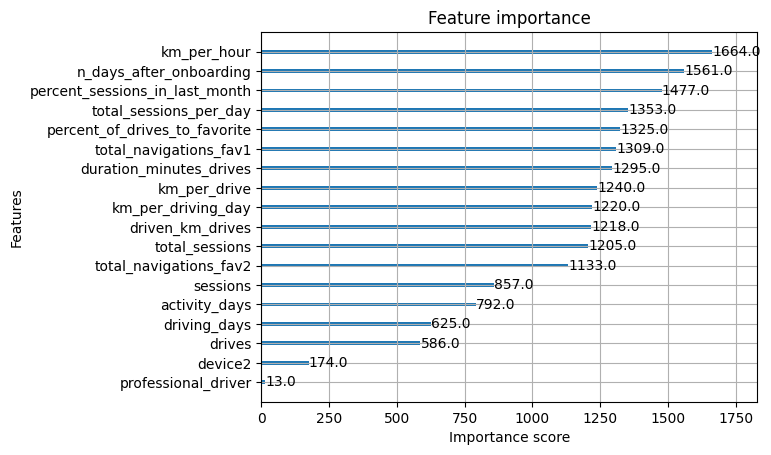

In [120]:
# Plotting feature importance to inspect the most important feature of my final model.
plot_importance(xgb_cv.best_estimator_);

##### <u>**5.4 Identifying an Optimal decision Threshold**</u>

The default decision threshold for most implementations of classification algorithms&mdash;including scikit-learn's&mdash;is 0.5. This means that, in the case of Waze models, if they predicted that a given user had a 50% probability or greater of churning, then that user was assigned a predicted value of `1`&mdash;the user was predicted to churn.

With imbalanced datasets where the response class is a minority, this threshold might not be ideal.

A precision-recall curve can help to visualize the trade-off between the model's precision and recall.

Here's the precision-recall curve for the XGBoost champion model on the test data.


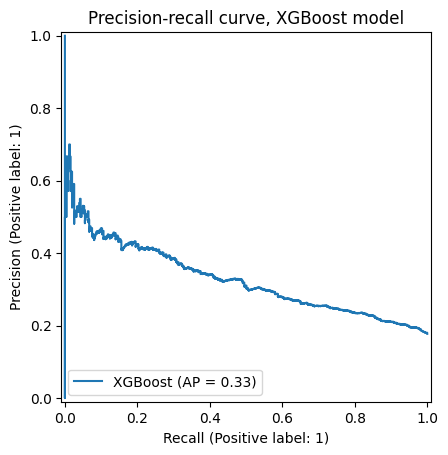

In [121]:
# Ploting precision-recall curve
display = PrecisionRecallDisplay.from_estimator(
    xgb_cv.best_estimator_, X_test, y_test, name='XGBoost'
    )
plt.title('Precision-recall curve, XGBoost model');

As recall increases, precision decreases. But what if you determined that false positives aren't much of a problem? For example, in the case of this Waze project, a false positive could just mean that a user who will not actually churn gets an email and a banner notification on their phone. It's very low risk.

So, what if instead of using the default 0.5 decision threshold of the model, you used a lower threshold?

Here's an example where the threshold is set to 0.4:

In [122]:
# Get predicted probabilities on the test data
predicted_probabilities = xgb_cv.best_estimator_.predict_proba(X_test)
predicted_probabilities

array([[0.9893069 , 0.01069305],
       [0.6178086 , 0.38219142],
       [0.99608326, 0.00391674],
       ...,
       [0.5979855 , 0.4020145 ],
       [0.9783987 , 0.02160134],
       [0.8906217 , 0.10937828]], dtype=float32)

The first number in the row is the probability of belonging to the negative class, and the second number in the row is the probability of belonging to the positive class. (Notice that the two numbers in each row are complementary to each other and sum to one.)

You can generate new predictions based on this array of probabilities by changing the decision threshold for what is considered a positive response. 

For example, the following code converts the predicted probabilities to {0, 1} predictions with a threshold of 0.4. In other words, any users who have a value ≥ 0.4 in the second column will get assigned a prediction of `1`, indicating that they churned.

In [123]:
# Create a list of just the second column values (probability of target)
probs = [x[1] for x in predicted_probabilities]

# Create an array of new predictions that assigns a 1 to any value >= 0.4
new_preds = np.array([1 if x >= 0.4 else 0 for x in probs])
new_preds

array([0, 0, 0, ..., 1, 0, 0])

In [124]:
# Get evaluation metrics for when the threshold is 0.4
get_test_scores('XGB with threshold set to = 0.4', new_preds, y_test)

,model,precision,recall,F1,accuracy
0,XGB with threshold set to = 0.4,0.411003,0.250493,0.311275,0.803497


In [125]:
results

,model,precision,recall,F1,accuracy
0,Logistic Regression,0.520000,0.090000,0.150000,0.820000
0,Random Forest CV,0.489785,0.128106,0.202676,0.821308
0,XGBoost CV,0.447907,0.170828,0.247101,0.815712
0,Random Forest on Validation set,0.447761,0.118343,0.187207,0.817832
0,XGBoost on Validation set,0.424242,0.165680,0.238298,0.812238
0,Champion Model: XGBoost on Test data,0.429907,0.181460,0.255201,0.812238


Compare the above two results from earlier .

Recall and F1 score increased significantly, while precision and accuracy decreased marginally.

So, using the precision-recall curve as a guide, suppose you knew that you'd be satisfied if the model had a recall score of 0.5 and you were willing to accept the ~30% precision score that comes with it. In other words, you'd be happy if the model successfully identified half of the people who will actually churn, even if it means that when the model says someone will churn, it's only correct about 30% of the time.

What threshold will yield this result? There are a number of ways to determine this. Here's one way to do it using a function.

In [126]:
def threshold_finder(y_test_data, probabilities, desired_recall):
    '''
    Find the decision threshold that most closely yields a desired recall score.

    Inputs:
        y_test_data: Array of true y values
        probabilities: The results of the `predict_proba()` model method
        desired_recall: The recall that you want the model to have

    Outputs:
        threshold: The decision threshold that most closely yields the desired recall
        recall: The exact recall score associated with `threshold`
    '''
    probs = [x[1] for x in probabilities]  # Isolate second column of `probabilities`
    thresholds = np.arange(0, 1, 0.001)    # Set a grid of 1,000 thresholds to test

    scores = []
    for threshold in thresholds:
        # Create a new array of {0, 1} predictions based on new threshold
        preds = np.array([1 if x >= threshold else 0 for x in probs])
        # Calculate recall score for that threshold
        recall = recall_score(y_test_data, preds)
        # Append the threshold and its corresponding recall score as a tuple to `scores`
        scores.append((threshold, recall))

    distances = []
    for idx, score in enumerate(scores):
        # Calculate how close each actual score is to the desired score
        distance = abs(score[1] - desired_recall)
        # Append the (index#, distance) tuple to `distances`
        distances.append((idx, distance))

    # Sort `distances` by the second value in each of its tuples (least to greatest)
    sorted_distances = sorted(distances, key=lambda x: x[1], reverse=False)
    # Identify the tuple with the actual recall closest to desired recall
    best = sorted_distances[0]
    # Isolate the index of the threshold with the closest recall score
    best_idx = best[0]
    # Retrieve the threshold and actual recall score closest to desired recall
    threshold, recall = scores[best_idx]

    return threshold, recall


Now, test the function to find the threshold that results in a recall score closest to 0.5.

In [127]:
# Get the predicted probabilities from the champion model
probabilities = xgb_cv.best_estimator_.predict_proba(X_test)

# Call the function
threshold_finder(y_test, probabilities, 0.5)

(np.float64(0.138), 0.5009861932938856)

Setting a threshold of 0.194 will result in a recall of 0.499.

To verify, let me repeat the steps performed earlier to get the other evaluation metrics for when the model has a threshold of 0.194. Based on the precision-recall curve, a 0.5 recall score should have a precision of ~0.3.

In [128]:
# Create an array of new predictions that assigns a 1 to any value >= 0.194
probs = [x[1] for x in probabilities]
new_preds = np.array([1 if x >= 0.194 else 0 for x in probs])

# Get evaluation metrics for when the threshold is 0.194
get_test_scores('XGB, threshold = 0.194', new_preds, y_test)

,model,precision,recall,F1,accuracy
0,"XGB, threshold = 0.194",0.330745,0.420118,0.370113,0.746503


It worked! Changing the decision threshold is another tool that can help us achieve useful results from your model.

##### <u>**5.4. Summary of Machine Learning modelling**</u>

* The XGBoost model made more use of many of the features than did the logistic regression model from earlier, which weighted a single feature (`activity_days`) very heavily in its final prediction.

* If anything, this underscores the importance of feature engineering. Notice that engineered features accounted for six of the top 10 features (and three of the top five). Feature engineering is often one of the best and easiest ways to boost model performance.

* Also, note that the important features in one model might not be the same as the important features in another model. That's why you shouldn't discount features as unimportant without thoroughly examining them and understanding their relationship with the dependent variable, if possible. These discrepancies between features selected by models are typically caused by complex feature interactions.

* Note that sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain a predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions.

* Would I recommend using this model for churn prediction? -
    - Well, it depends. What would the model be used for? If it's used to drive consequential business decisions, then no. The model is not a strong enough predictor, as made clear by its poor recall score.
    - However, if the model is only being used to guide further exploratory efforts, then it can have value.

* Tradeoffs that were made by splitting the data into training, validation, and test sets as opposed to just training and test sets:
    - Splitting the data three ways means that there is less data available to train the model than splitting just two ways.
    - However, performing model selection on a separate validation set enables testing of the champion model by itself on the test set, which gives a better estimate of future performance than splitting the data two ways and selecting a champion model by performance on the test data.

* Benefit of using a logistic regression model over an ensemble of tree-based models (like random forest or XGBoost) for classification tasks:
    - Logistic regression models are easier to interpret. Because they assign coefficients to predictor variables, they reveal not only which features factored most heavily into their final predictions, but also the directionality of the weight.
    - In other words, they tell you if each feature is positively or negatively correlated with the target in the model's final prediction.
* Benefit of using an ensemble of tree-based models like random forest or XGBoost over a logistic regression model for classification tasks
    - Tree-based model ensembles are often better predictors.
    - If the most important thing is the predictive power of the model, then tree-based modeling will usually win out against logistic regression (but not always!).
    - They also require much less data cleaning and require fewer assumptions about the underlying distributions of their predictor variables, so they're easier to work with.
* What could I do to improve this model?:
    - New features could be engineered to try to generate a better predictive signal, as they often do if you have domain knowledge.
    - In the case of this model, the engineered features made up over half of the top 10 most-predictive features used by the model.
    - It could also be helpful to reconstruct the model with different combinations of predictor variables to reduce noise from unpredictable features.
* Some additional features I would like to have to help improve the model:
    - It would be helpful to have drive-level information for each user (such as drive times, geographic locations, etc.).
    - It would probably also be helpful to have more granular data to know how users interact with the app. For example, how often do they report or confirm road hazard alerts?
    - Finally, it could be helpful to know the monthly count of unique starting and ending locations each driver inputs.


---

#### 6. Recommendations
- Actionable insights for Waze (targeted retention, app improvements)
- What Waze should do based on your findings

---

#### 7. Limitations & Next Steps
- Data issues, modeling limits
- What future data could improve results


## Appendix
- Additional code
- Charts or outputs not central to the main story
- Resources used:
    * seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html)
    * seaborn's [`regplot()`](https://seaborn.pydata.org/generated/seaborn.regplot.html)
    * scipy's [`t-test documentation`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)